<p>Importing necesary modules, libraries and data for the proyect.</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from PIL import Image
import os
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
T_min = pd.read_csv('Data/formato_Tmin_ext.csv',delimiter=';')
T_med = pd.read_csv('Data/formato_Tmed.csv',delimiter=';')
T_max = pd.read_csv('Data/formato_Tmax_ext.csv', delimiter=';')

In [3]:
T_0 = pd.read_csv('Data/formato_Tmin0.csv')
T_0_5 = pd.read_csv('Data/formato_Tmin5_0.csv')
T_35_40 = pd.read_csv('Data/formato_Tmax35_40.csv')
T_40 = pd.read_csv('Data/formato_Tmax40.csv')

In [4]:
precip = pd.read_csv('Data/formato_Prec.csv')
precip_normal = pd.read_csv('Data/formato_Prec_normal.csv')

In [5]:
locacion = pd.read_csv('Data/Locacion.csv')

In [6]:
T_min.head()

Estaciones  codigo     1     2     3     4    5    6    7   
0           Mcal. Estigarribia   86068  20.0  17.0  13.4  10.6  1.5 -0.1  2.0  \
1  Puerto Casado (La Victoria)   86086  22.0  17.0  13.6  13.6  6.0  3.6  7.0   
2         Pedro Juan Caballero   86097  15.8  14.6  10.2  10.4  5.0  1.8  6.2   
3                Pozo Colorado   86128  19.6  18.8  13.8   9.8  5.0  2.0  5.0   
4                   Concepcion   86134  20.0  16.0  13.6  11.0  5.0  2.4  5.5   

     8     9    10    11    12  
0  1.0   7.5  13.0   8.4  18.6  
1  6.0  12.0  14.0  11.0  21.0  
2  3.0   6.4  13.0   7.0  18.0  
3  5.0   8.8  12.0  10.0  19.0  
4  4.2   8.2  12.0   9.5  17.0

In [7]:
meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]

<h2>Comportamiento de la temperatura</h2>

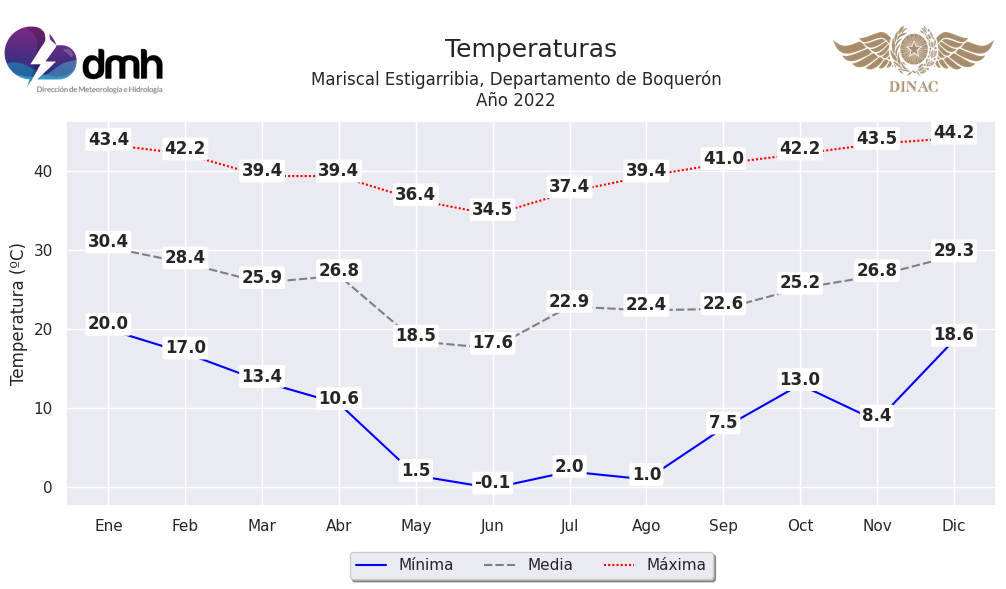

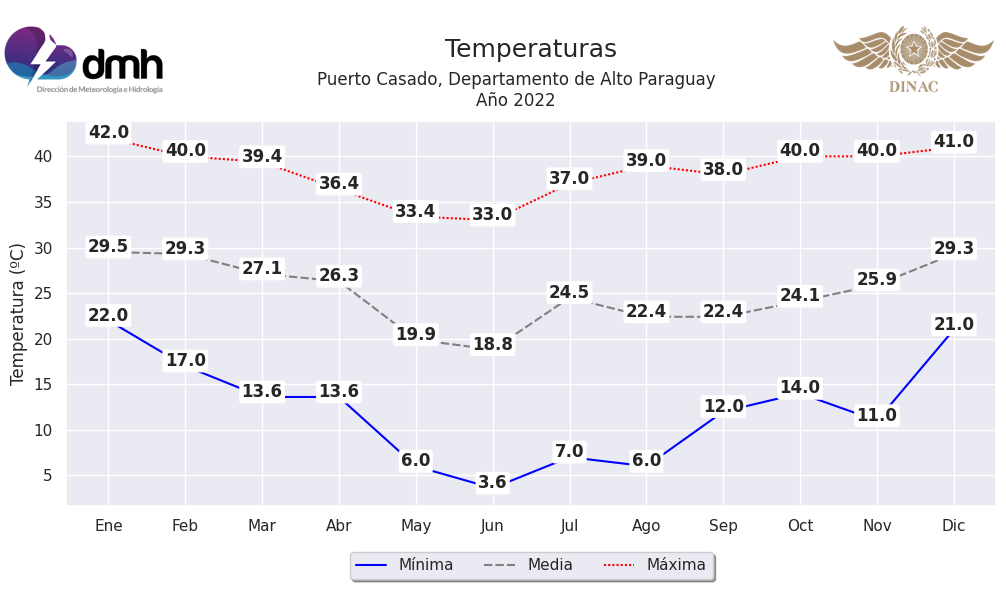

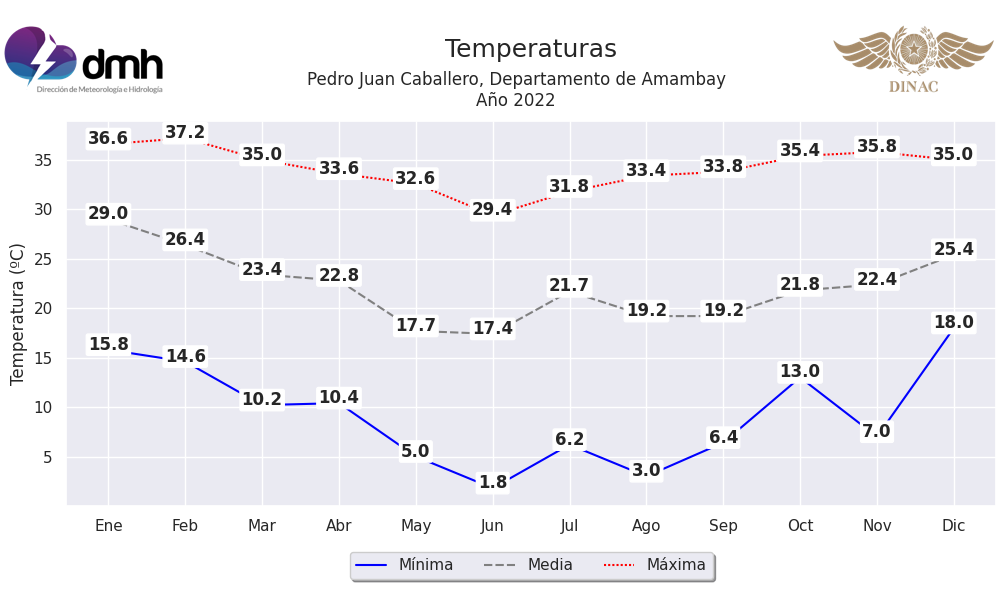

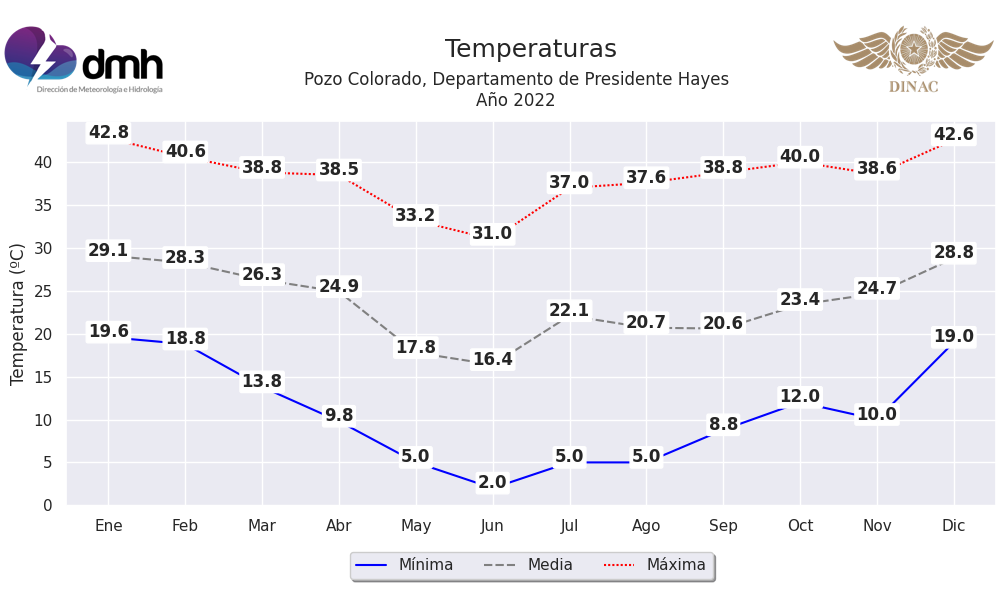

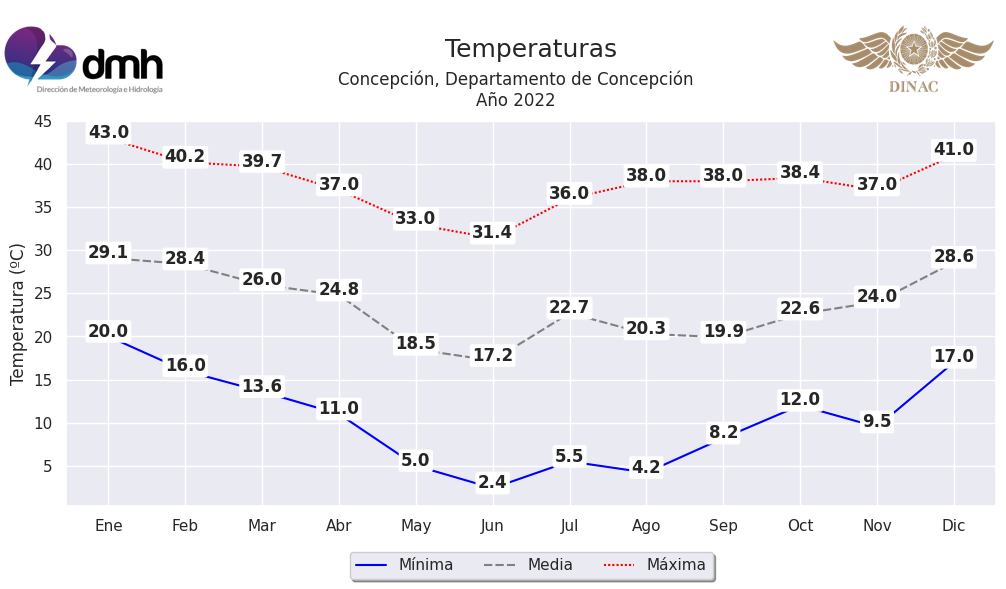

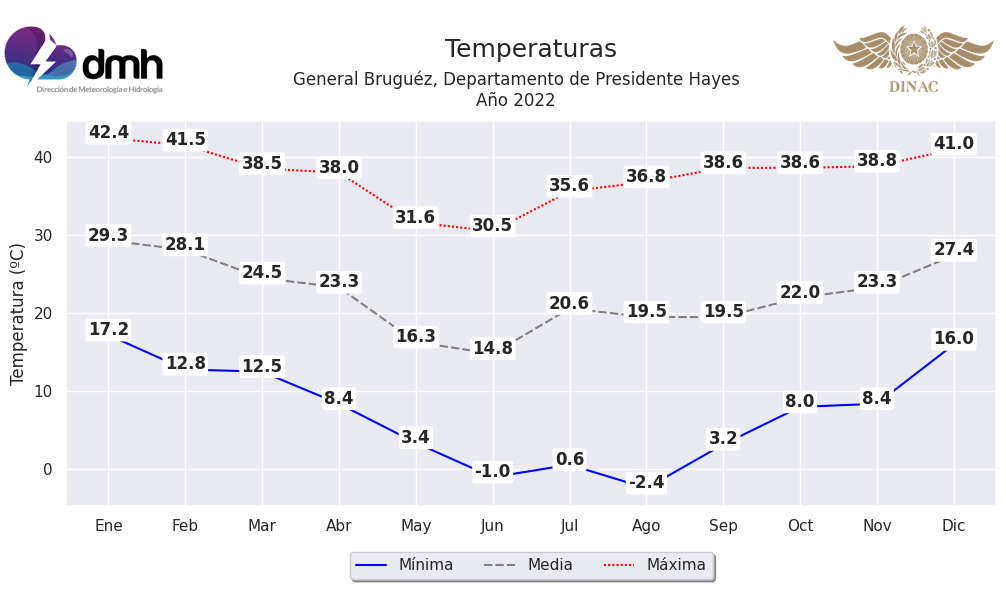

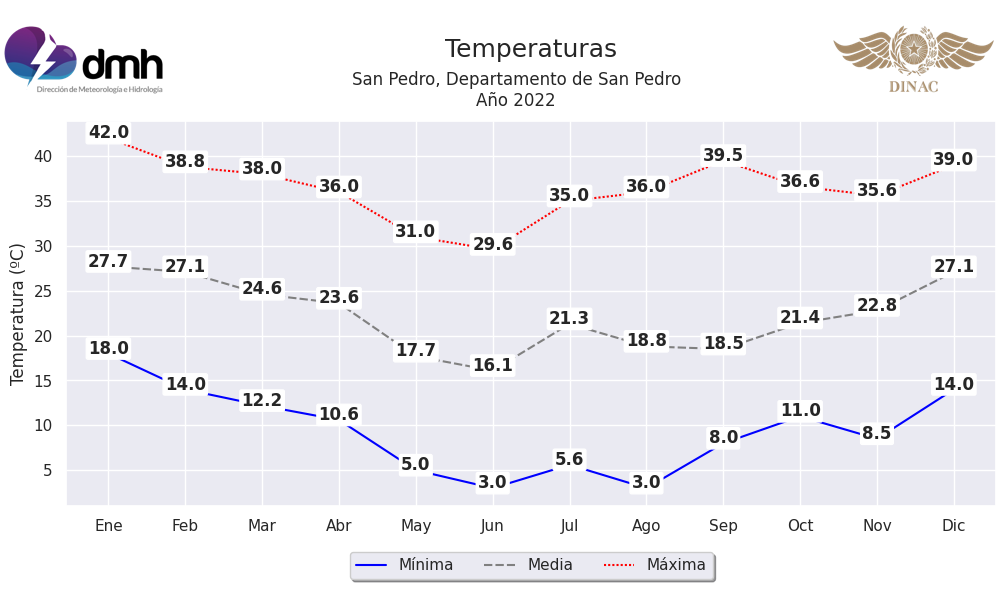

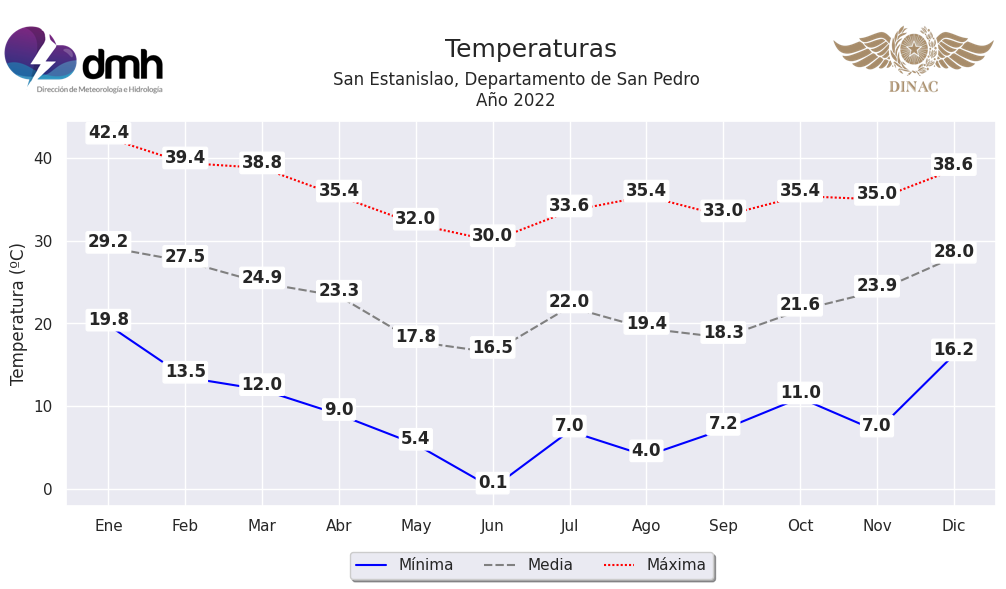

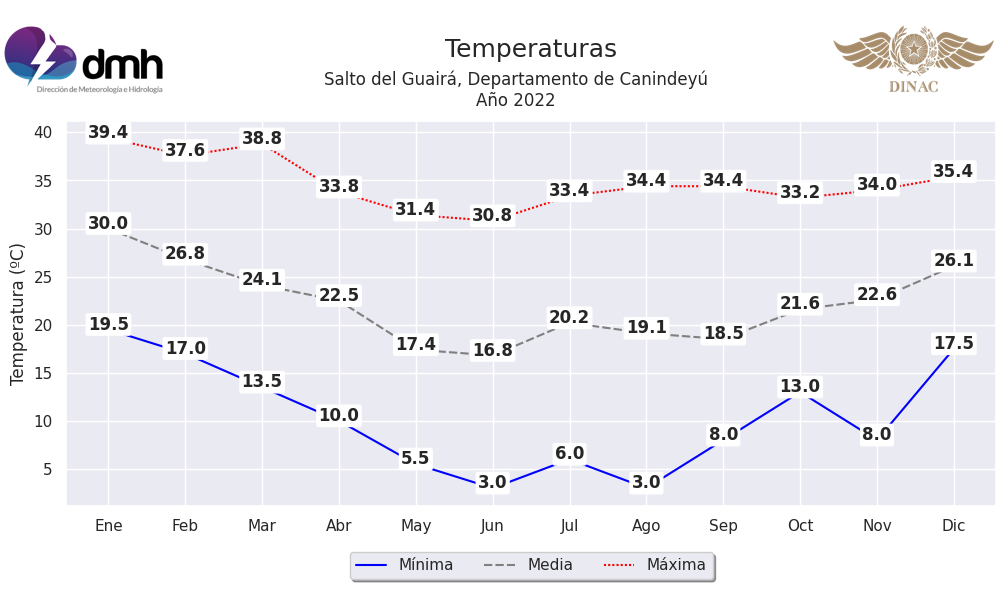

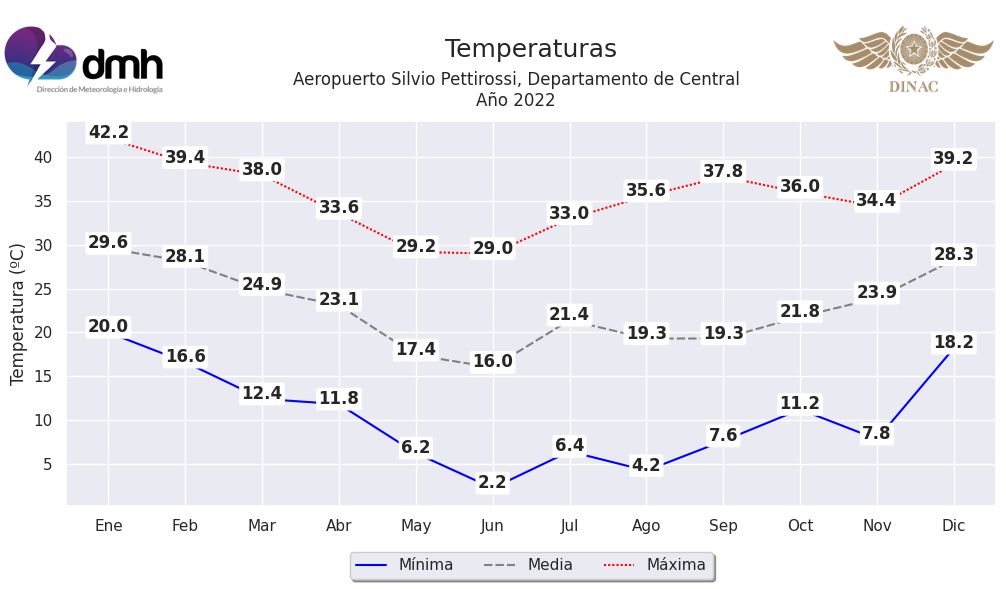

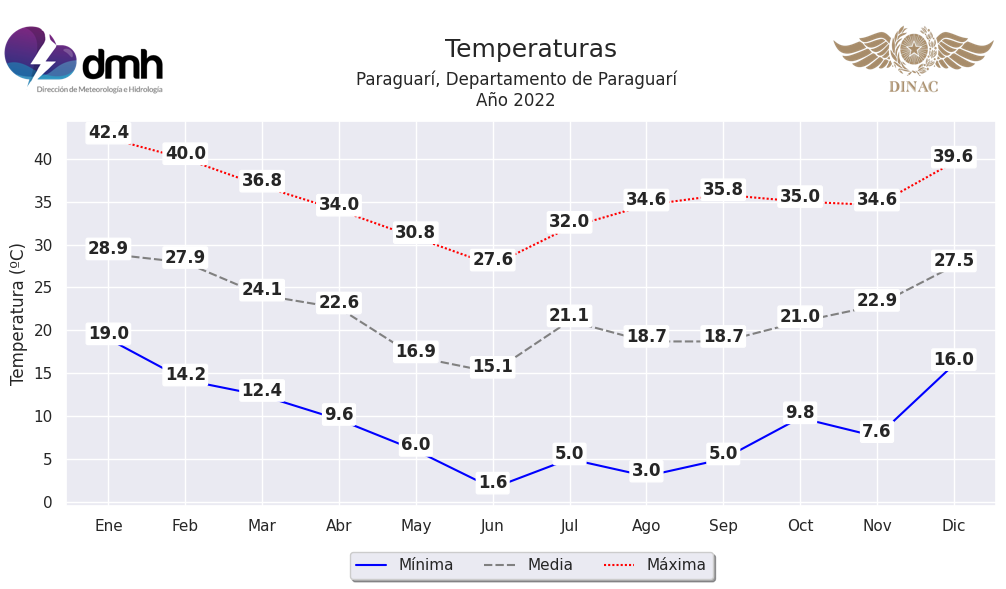

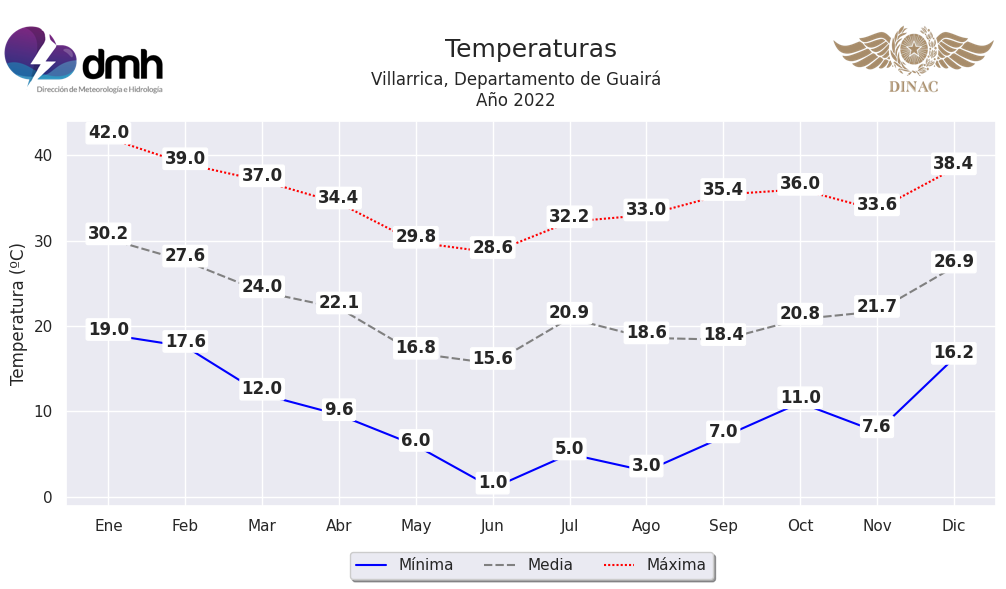

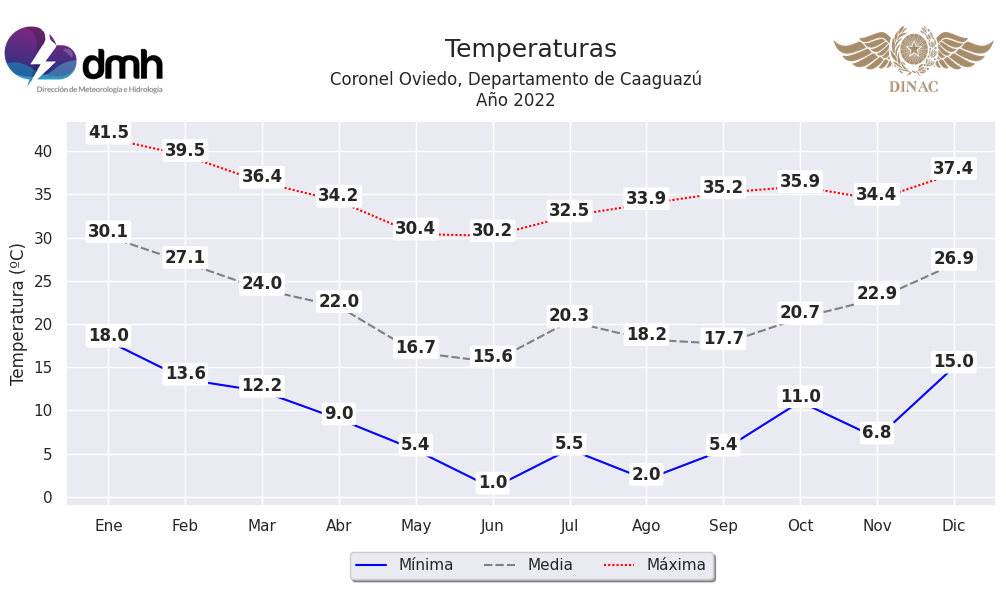

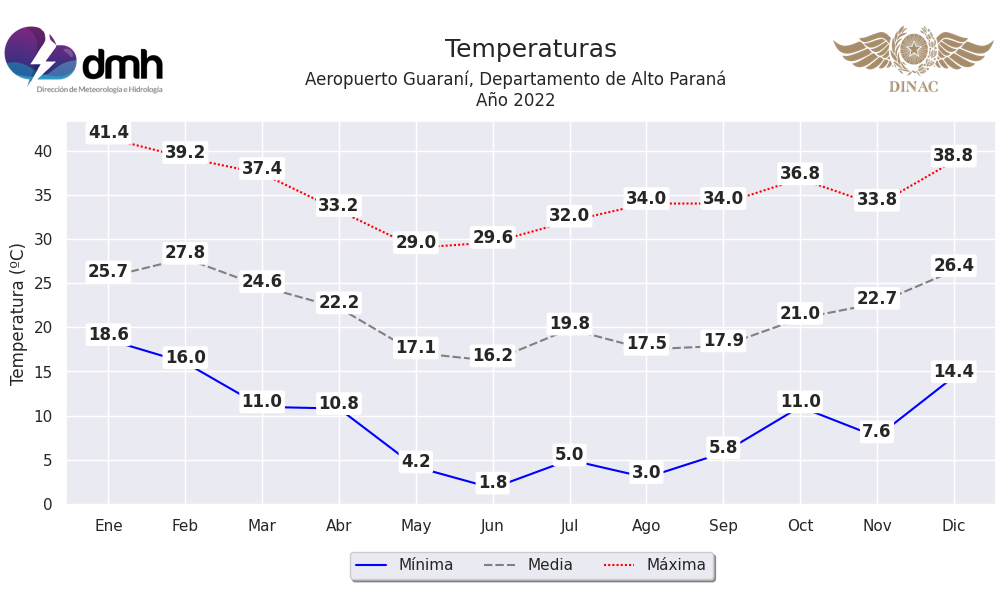

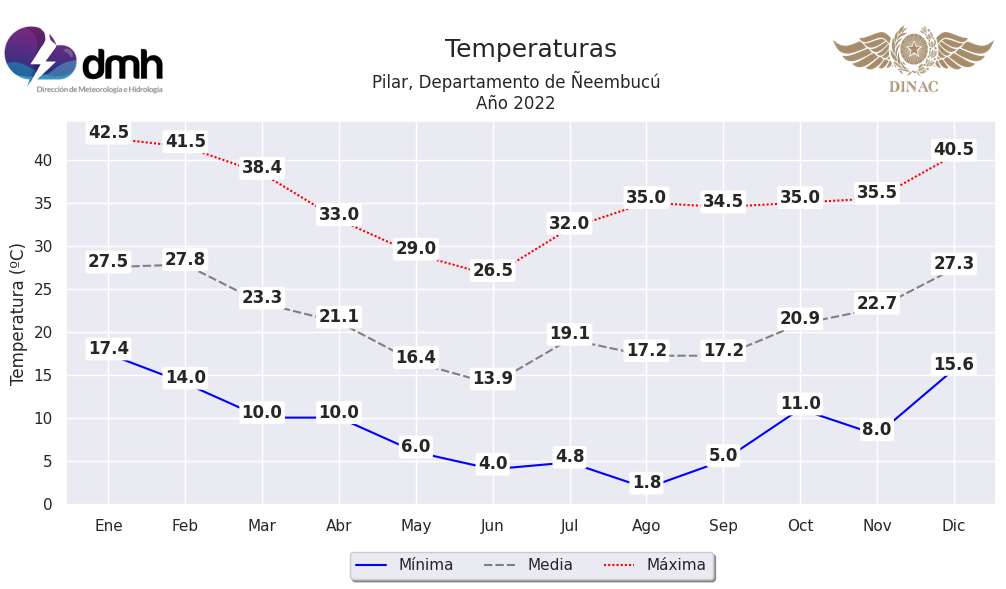

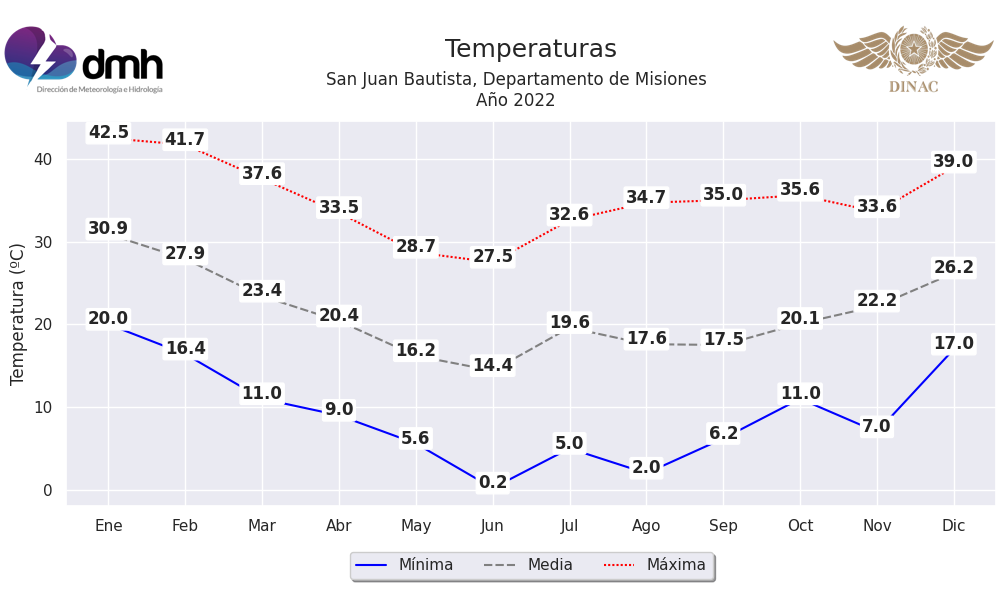

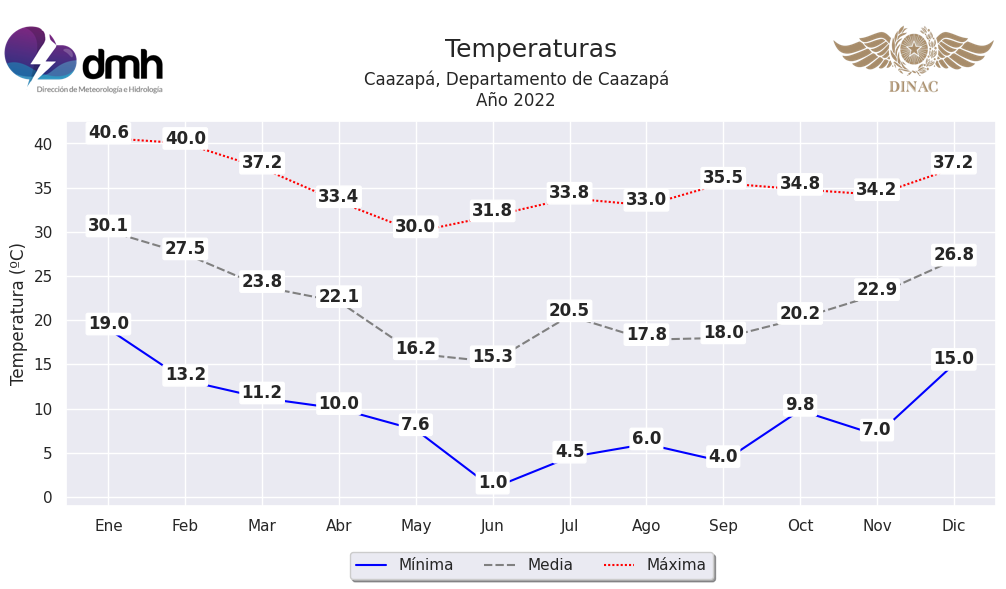

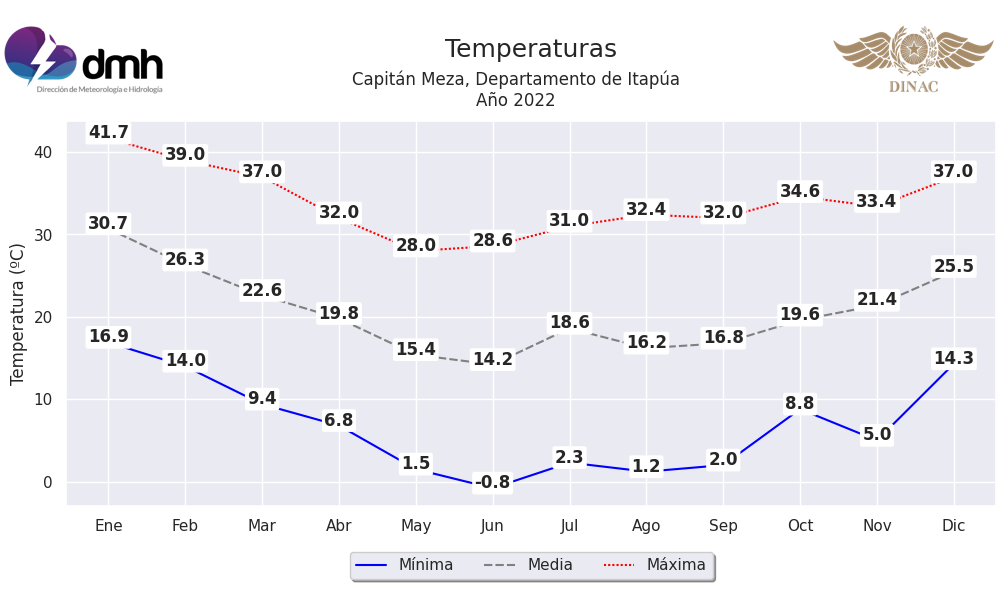

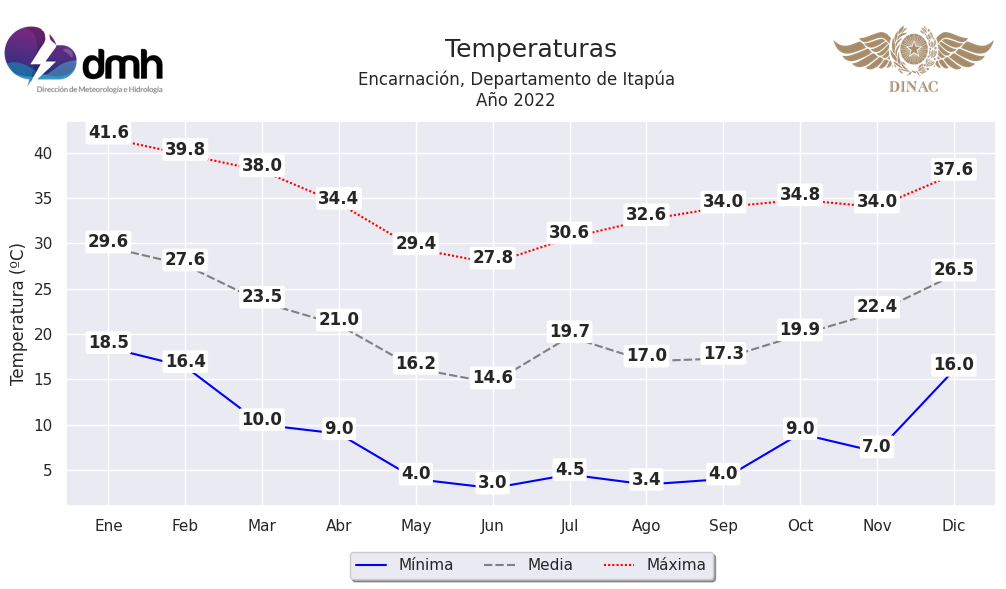

In [8]:
for j in range(T_min.shape[0]):
    
    datos = pd.DataFrame(columns=['Mínima','Media','Máxima'])
        
    datos['Mínima'], datos['Media'], datos['Máxima']= T_min.iloc[j,2:], T_med.iloc[j,2:], T_max.iloc[j,2:]
    
    datos["Mes"] = meses
    
    datos = datos.set_index("Mes")
    
    os.makedirs(T_min.Estaciones[j].replace('.','_').replace(' ','_'),  exist_ok=True)
    
    estacion = locacion.iloc[j,1:]

    sns.set_theme()

    fig_size = (12, 5)

    box=dict(boxstyle="round", ec="white", fc="white",pad=0.1)

    plt.figure(figsize=fig_size)

    ax=sns.lineplot(data=datos, palette=['blue','gray','red'], linewidth=1.5)

    plt.title('\nTemperaturas\n\n', fontsize=18)
    
    plt.suptitle(estacion.Estacion + ', Departamento de ' + estacion.Departamento + '\nAño 2022\n', fontsize=12)

    dimensiones = (168, 72)

    logo_dmh = Image.open('Data/logo_dmh1.png').resize(dimensiones)

    logo_dinac = Image.open('Data/dinac1.png').resize(dimensiones)

    x_dinac = int(fig_size[0]*(1-0.308)*100)

    y_logo = int(fig_size[1]*(1-0.0125)*100)

    ax.figure.figimage(logo_dmh, 0, y_logo, zorder=1)

    ax.figure.figimage(logo_dinac, x_dinac, y_logo, zorder=1)

    for i in range(12):
         plt.text(i, datos['Mínima'][i], datos['Mínima'][i], ha='center', size='medium', weight='semibold', bbox=box)

    for i in range(12):
         plt.text(i, datos['Media'][i], datos['Media'][i], ha='center', size='medium', weight='semibold', bbox=box)

    for i in range(12):
         plt.text(i, datos['Máxima'][i], datos['Máxima'][i], ha='center', size='medium', weight='semibold', bbox=box)

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)

    ax.set_xticklabels(meses)

    plt.xlabel(None)

    plt.ylabel("Temperatura (ºC)")
    
    nombre_im = T_min.Estaciones[j].replace('.','_').replace(' ','_') + '/' + 'Temperaturas-' + estacion.Estacion.replace('.','_').replace(' ','_')

    ax.figure.savefig(nombre_im, bbox_inches='tight')

<h2>Histograma de valores extremos</h2>

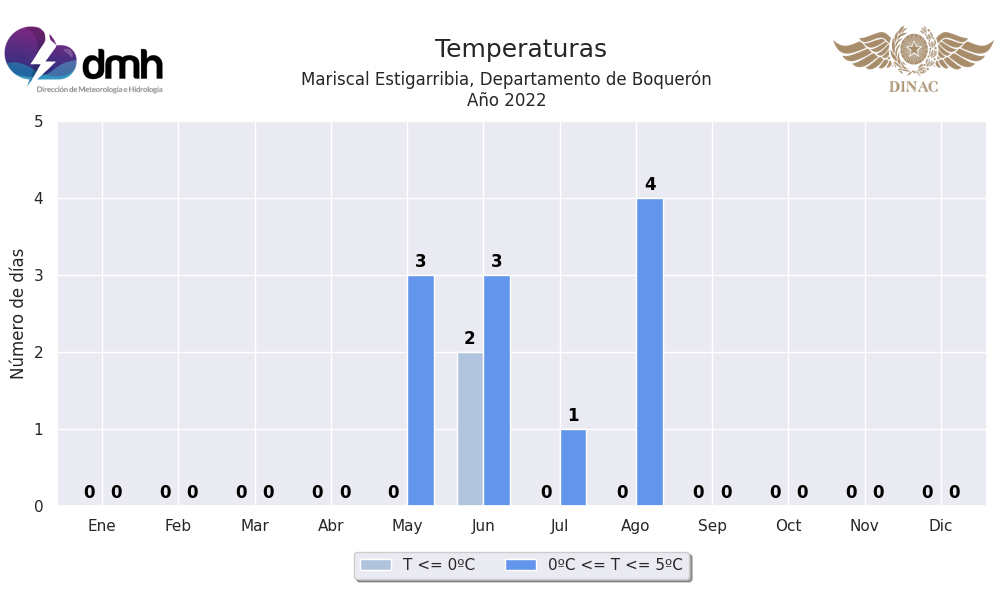

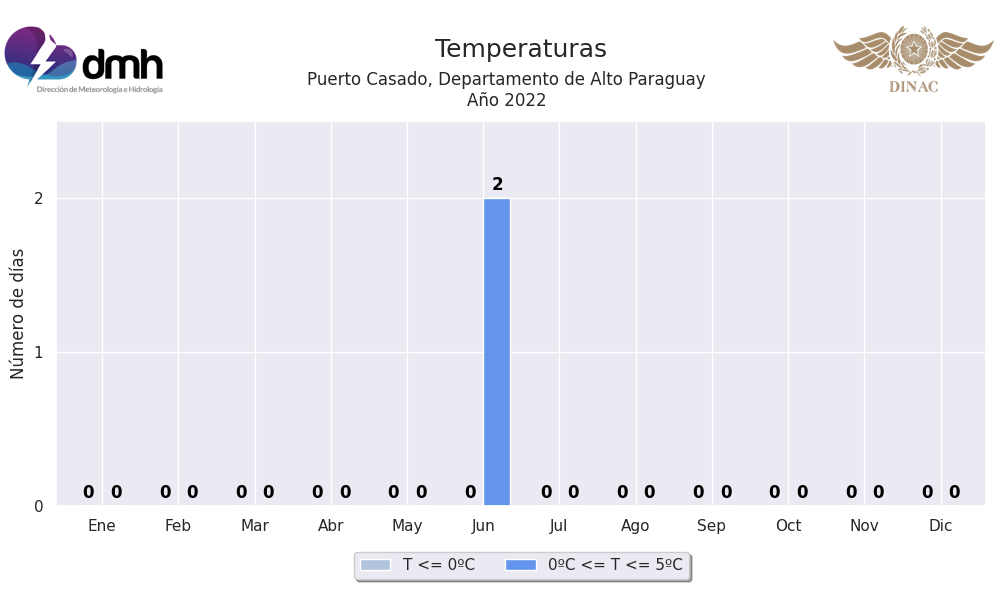

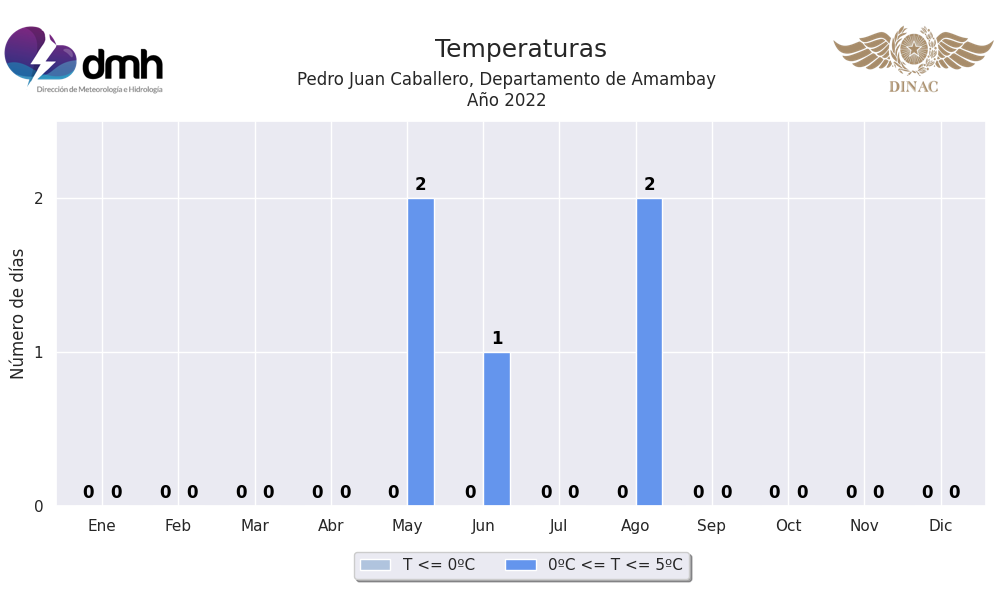

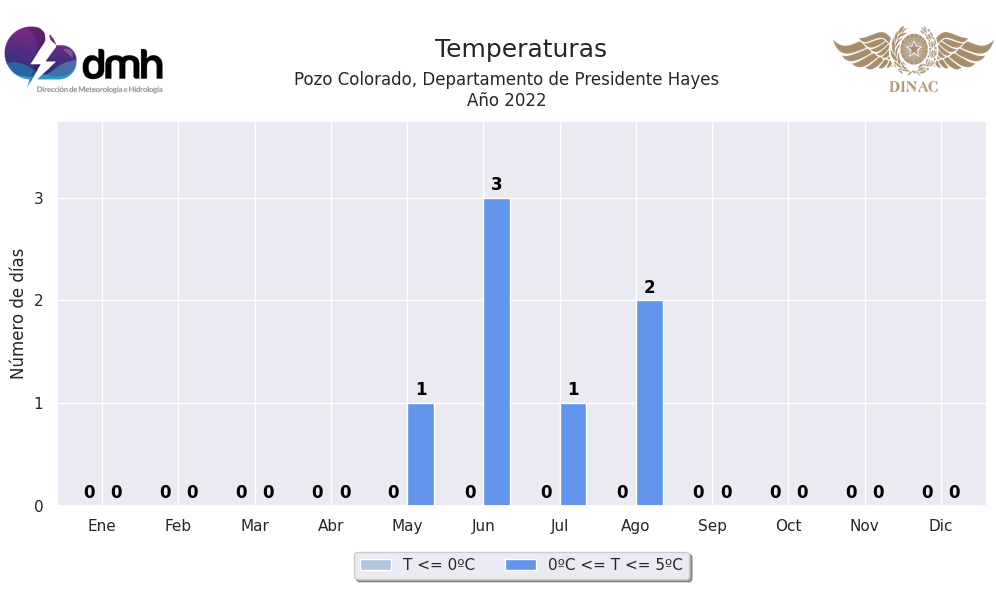

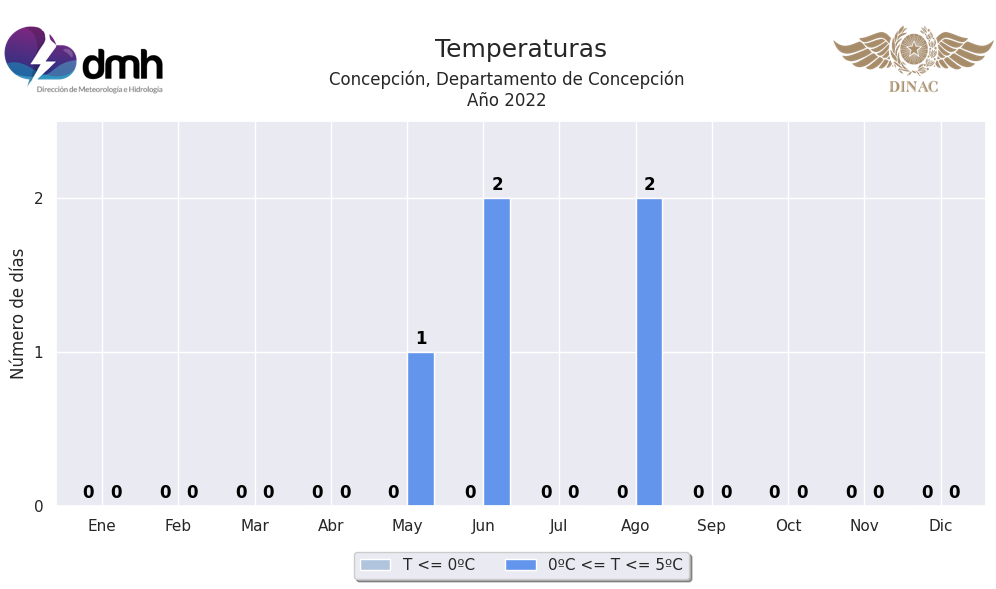

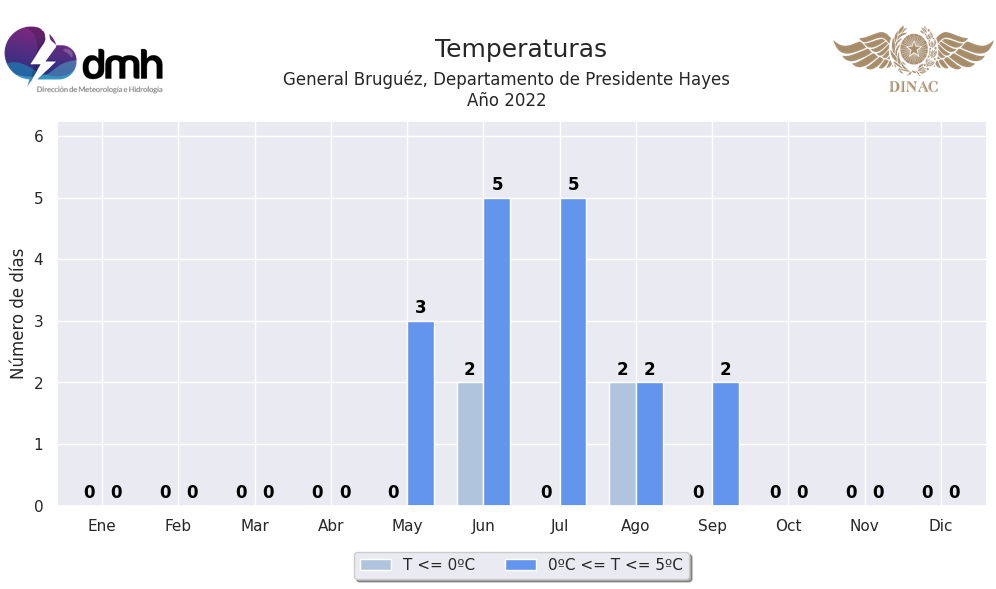

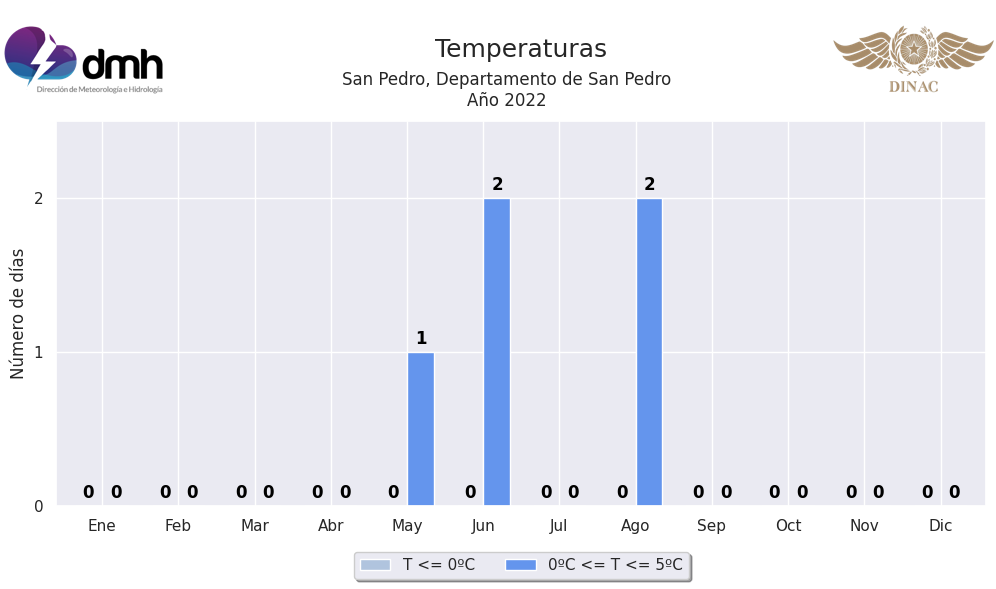

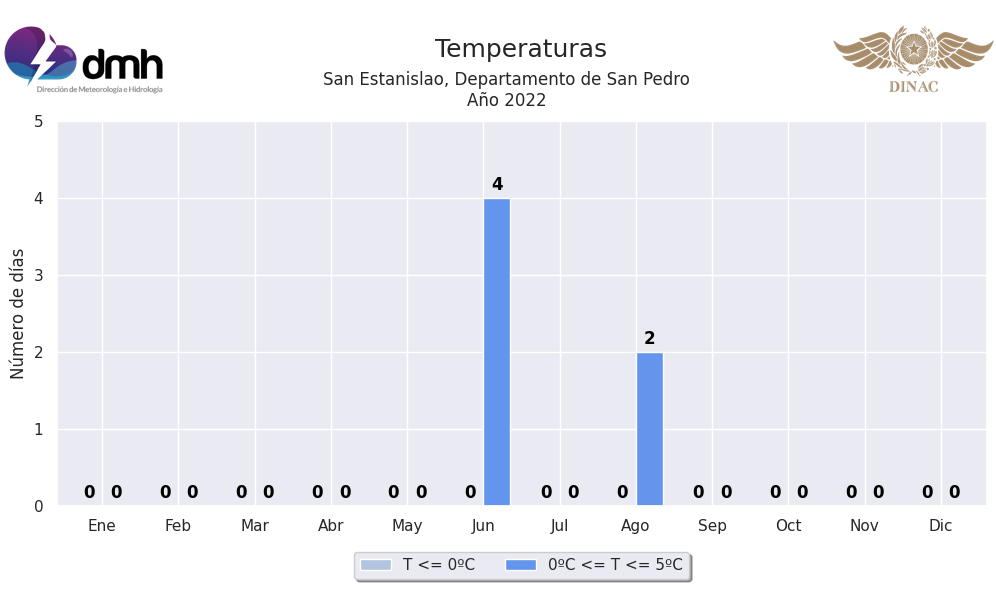

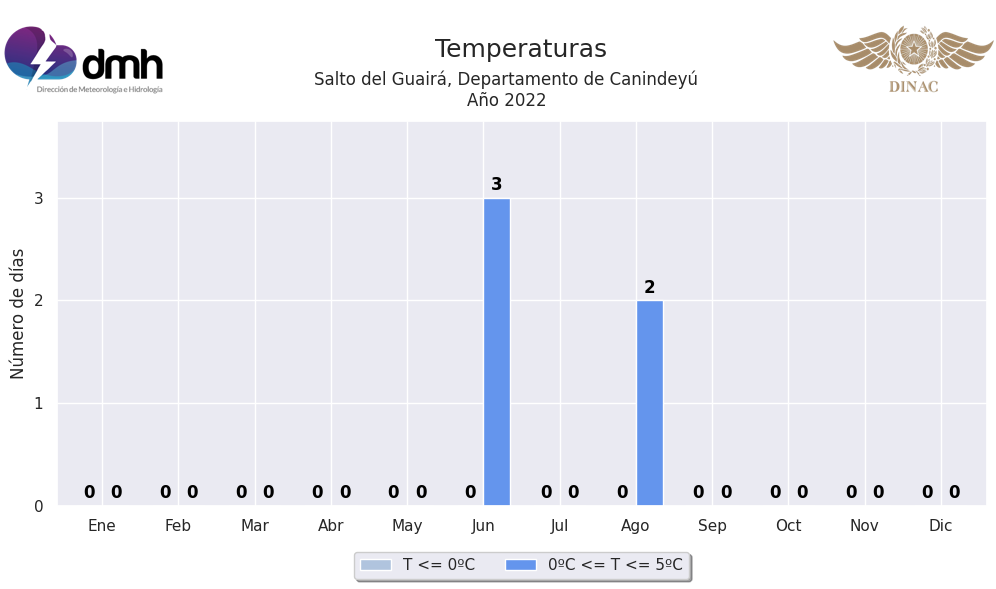

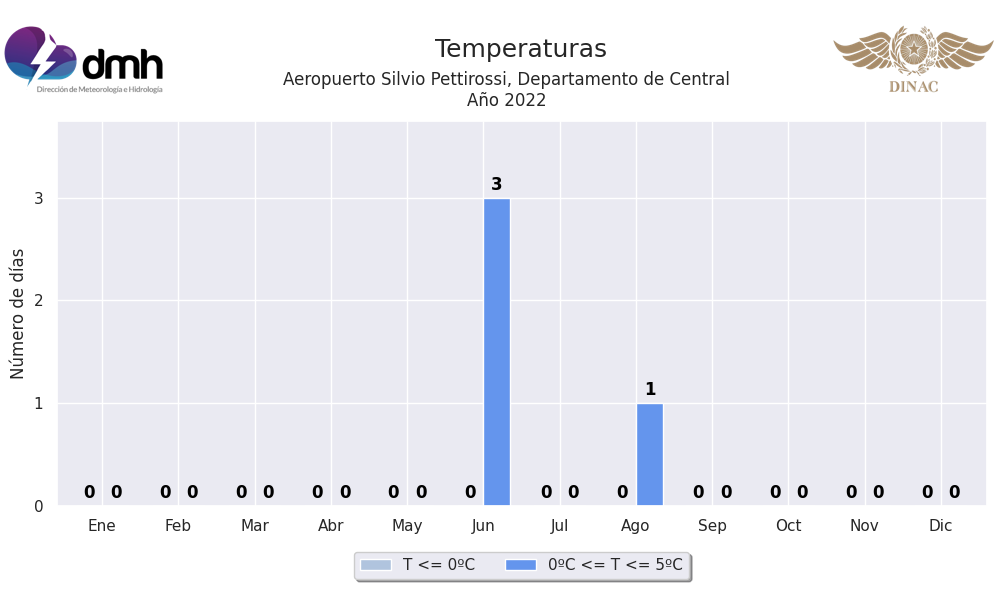

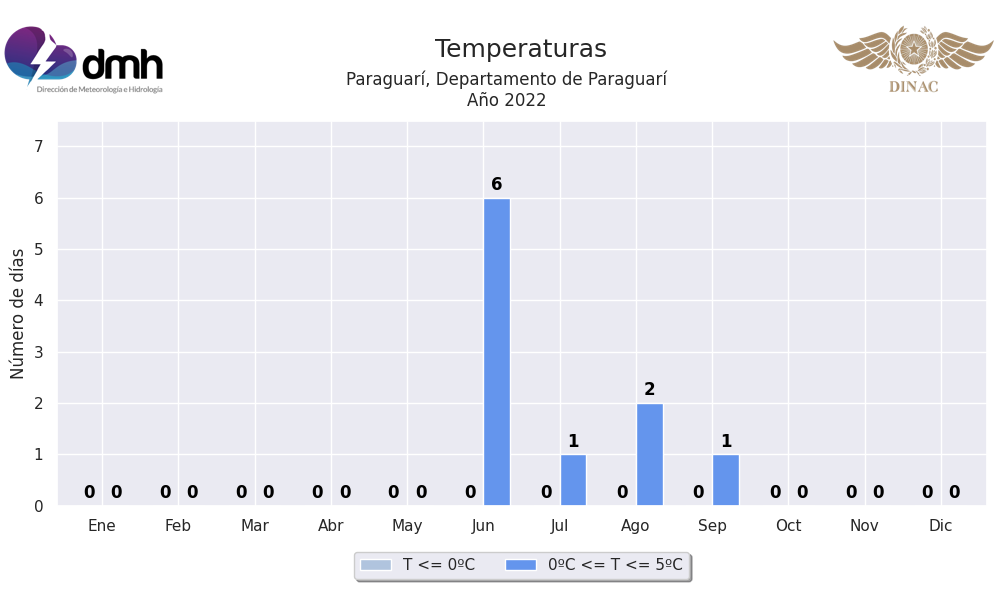

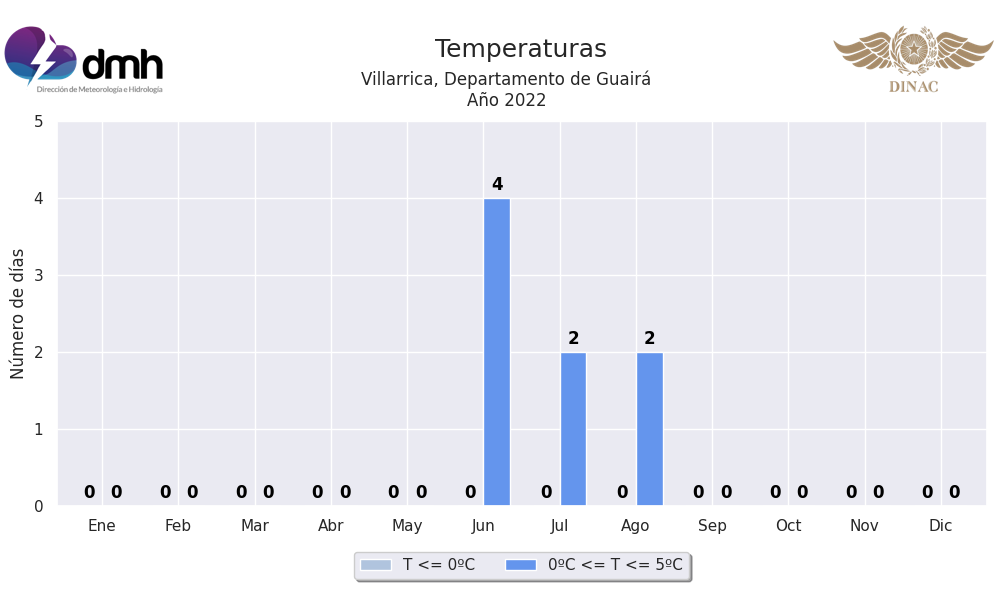

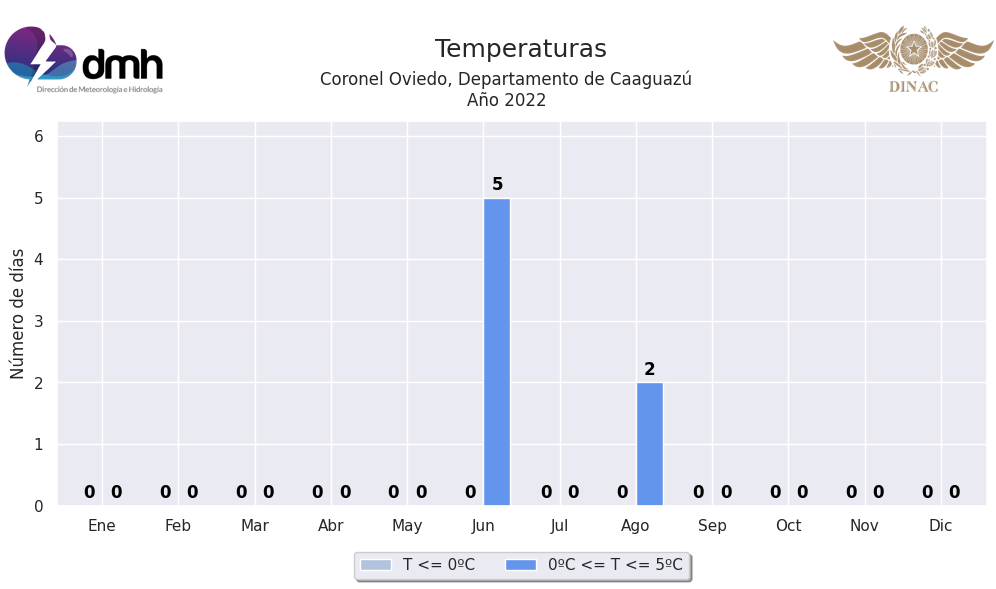

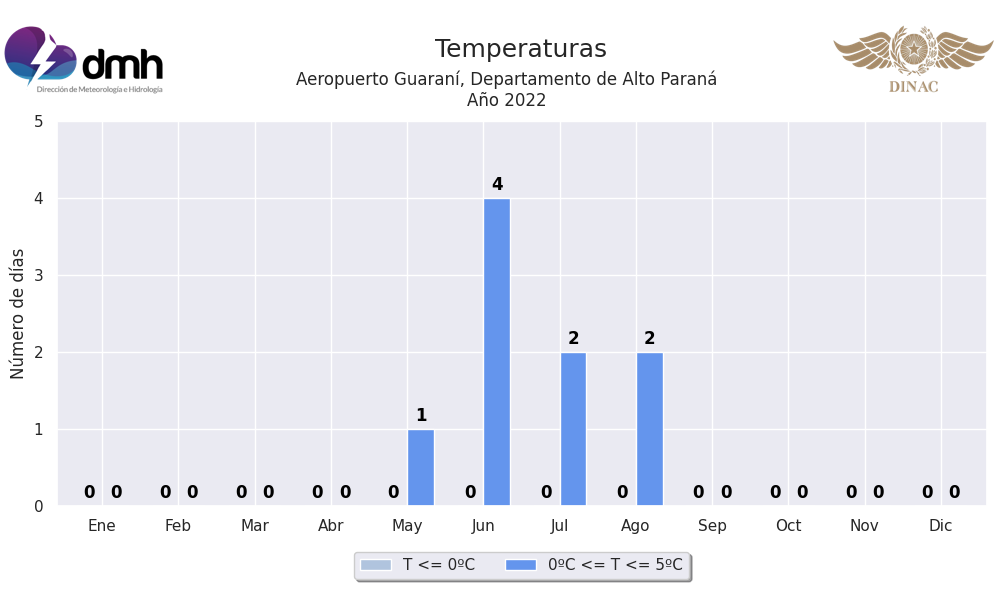

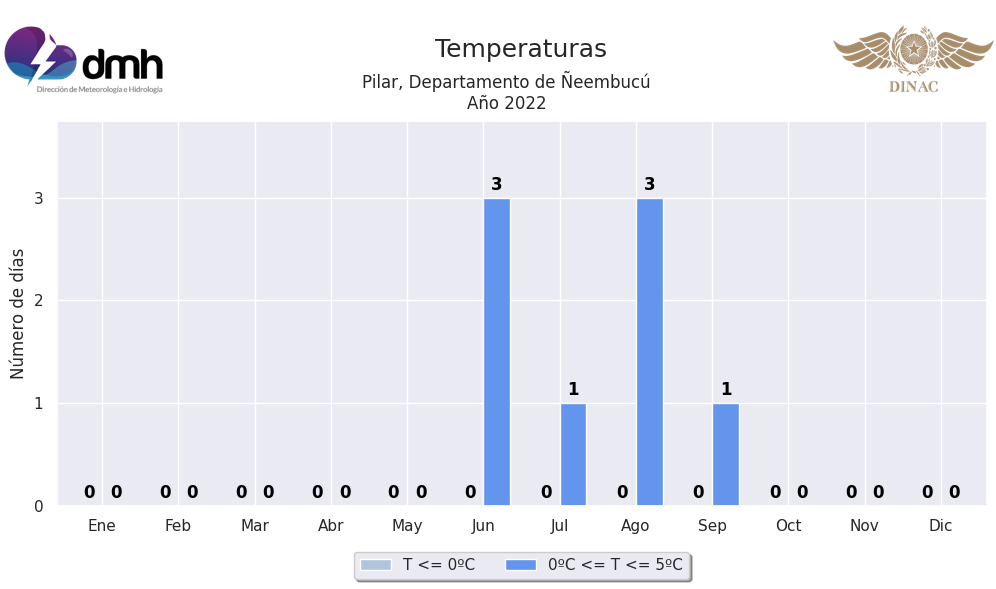

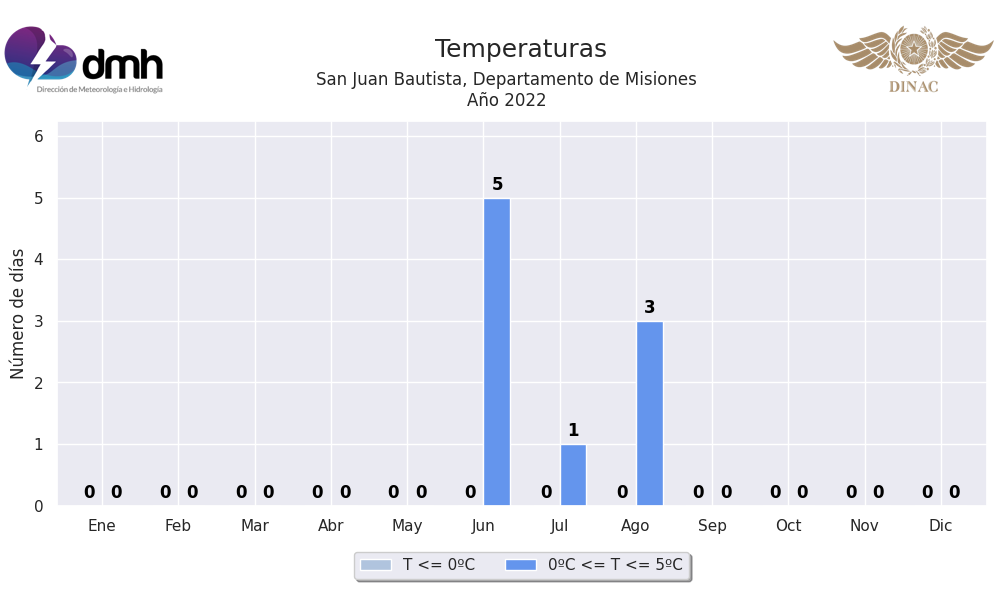

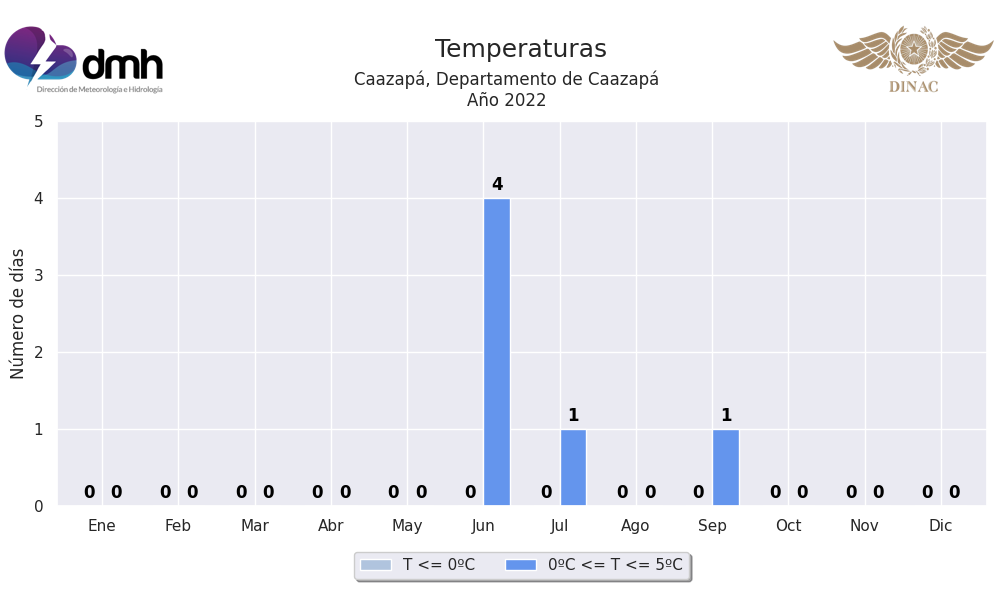

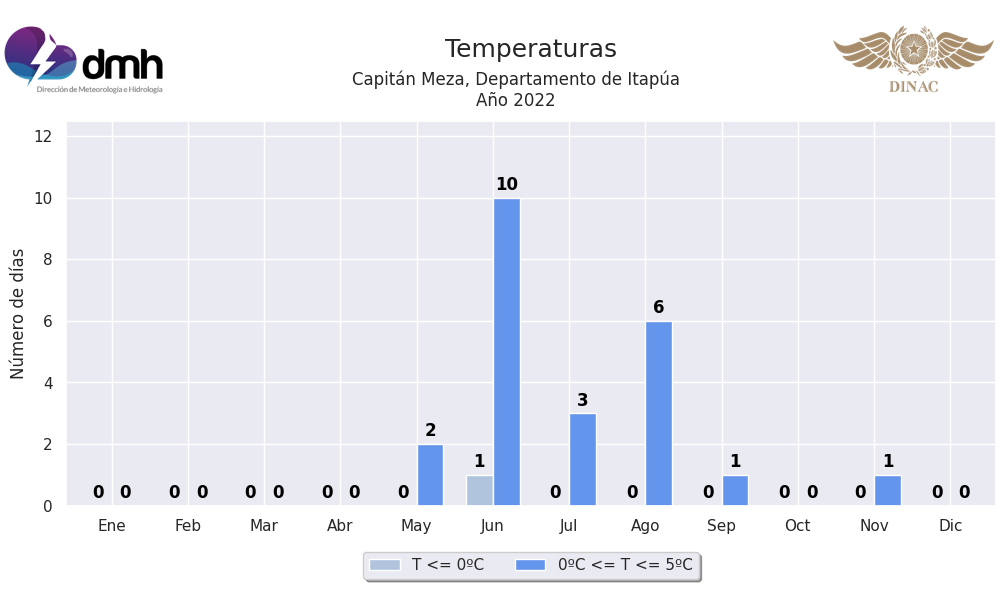

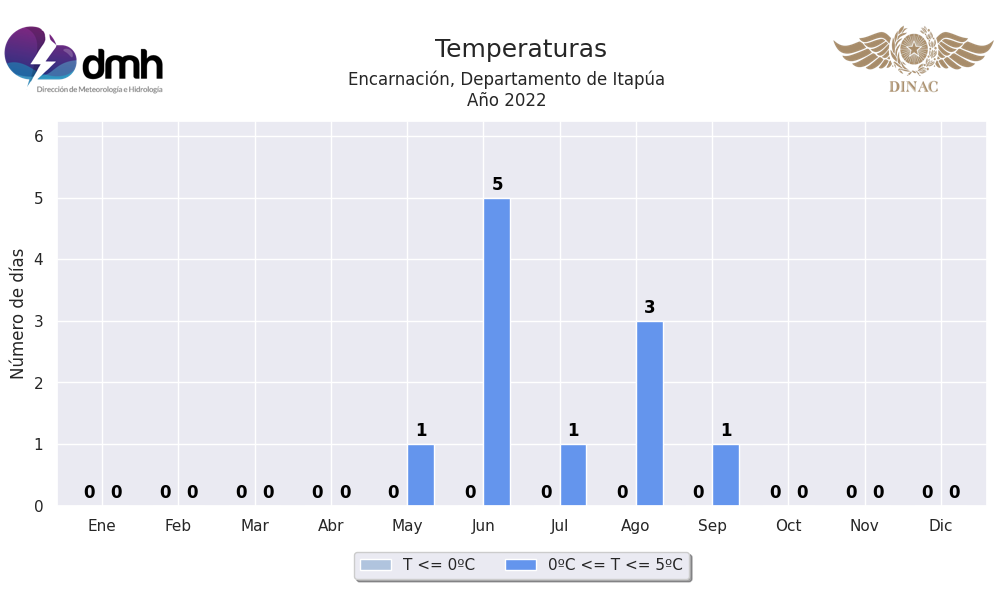

In [9]:
for j in range(T_min.shape[0]):
    
    datos = pd.DataFrame(columns=['T_0','T_0_5'])
        
    datos['T_0'], datos['T_0_5']= T_0.iloc[j,2:], T_0_5.iloc[j,2:]
    
    datos["Mes"] = meses
    
    datos = datos.set_index("Mes")
    
    valor_max = max(datos.max())
    
    estacion = locacion.iloc[j,1:]

    # create a figure and axes for the plot

    fig_size = (12, 5)

    fig, ax = plt.subplots(figsize=(20, 10))

    datos[['T_0','T_0_5']].plot.bar(ax=ax, width=0.7, figsize=fig_size, color=['lightsteelblue','cornflowerblue'] )

    # load the image
    dimensiones = (168, 72)

    logo_dmh = Image.open('Data/logo_dmh1.png').resize(dimensiones)

    logo_dinac = Image.open('Data/dinac1.png').resize(dimensiones)

    x_dinac = int(fig_size[0]*(1-0.308)*100)

    y_logo = int(fig_size[1]*(1-0.0125)*100)

    ax.figure.figimage(logo_dmh, 0, y_logo, zorder=1)

    ax.figure.figimage(logo_dinac, x_dinac, y_logo, zorder=1)

    for i in range(12):
        #plt.text(i-0.12+0.07*switch(datos.T_0[i]), datos.T_0[i]-0.1, datos.T_0[i], rotation = 0, va="top", ha='right', size='medium', weight='semibold', color="white")
        plt.text(i-0.18, datos.T_0[i] + valor_max*0.025, datos.T_0[i], rotation = 0, ha='center', size='medium', weight='semibold', color="black") 

    for i in range(12):
        #plt.text(i+0.25+0.1*switch(datos.T_0_5[i]), datos.T_0_5[i]-0.1, datos.T_0_5[i], rotation = 0, va="top", ha='right', size='medium', weight='semibold', color="white")
        plt.text(i+0.18, datos.T_0_5[i] + valor_max*0.025, datos.T_0_5[i], rotation = 0, ha='center', size='medium', weight='semibold', color="black")

    ax.set_xticklabels(meses)

    plt.xticks(rotation=0)

    ax.legend(['T <= 0ºC', '0ºC <= T <= 5ºC'], loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

    plt.title('\nTemperaturas\n\n', fontsize=18)

    plt.suptitle(estacion.Estacion + ', Departamento de ' + estacion.Departamento + '\nAño 2022\n', fontsize=12)

    plt.xlabel(None)

    plt.ylabel('Número de días')
    
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    ax.set_ylim(top=valor_max*1.25)

    nombre_im = T_min.Estaciones[j].replace('.','_').replace(' ','_') + '/' + 'T_minimas-' + estacion.Estacion.replace('.','_').replace(' ','_')

    ax.figure.savefig(nombre_im, bbox_inches='tight')

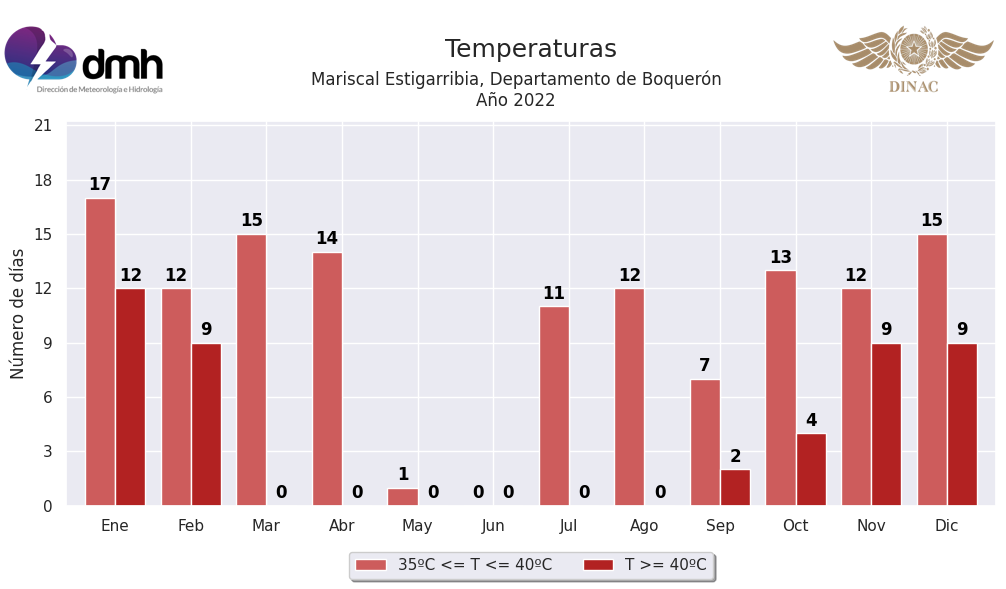

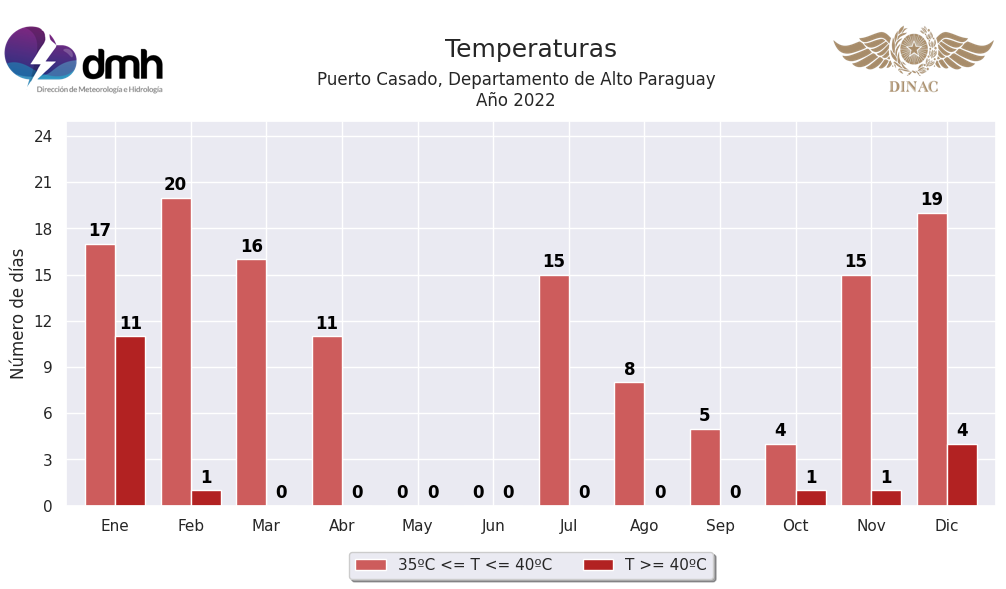

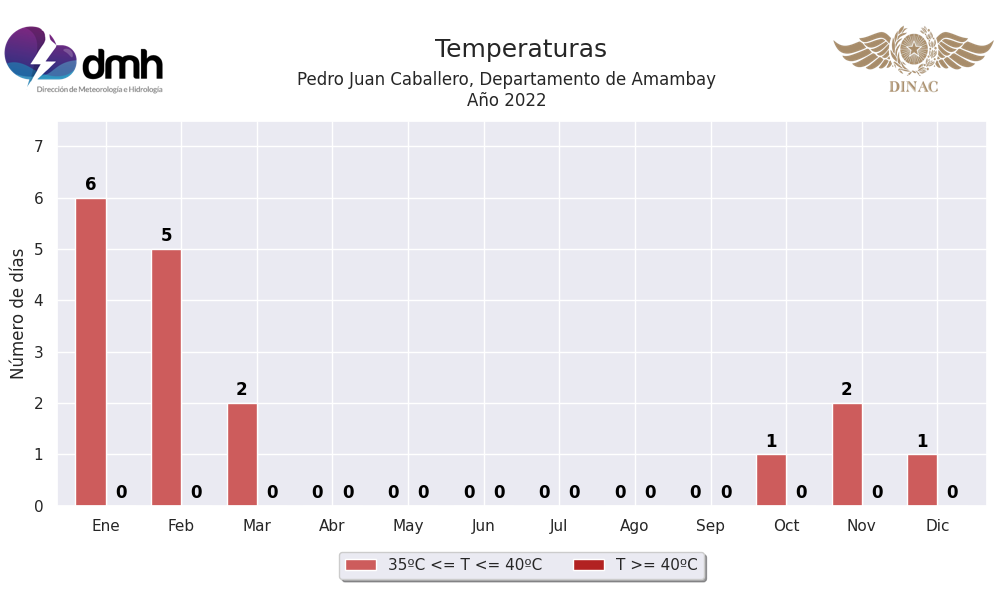

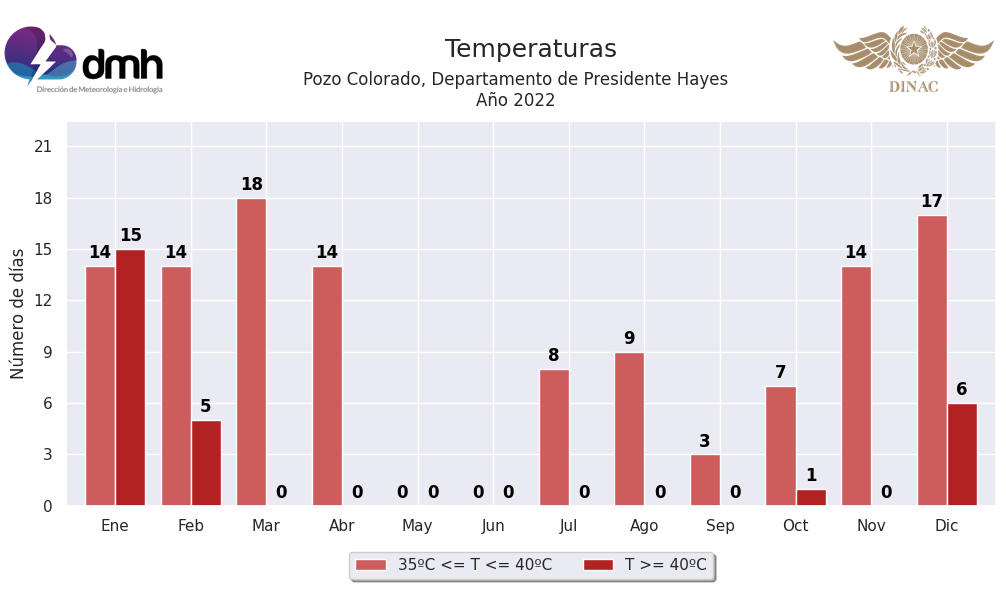

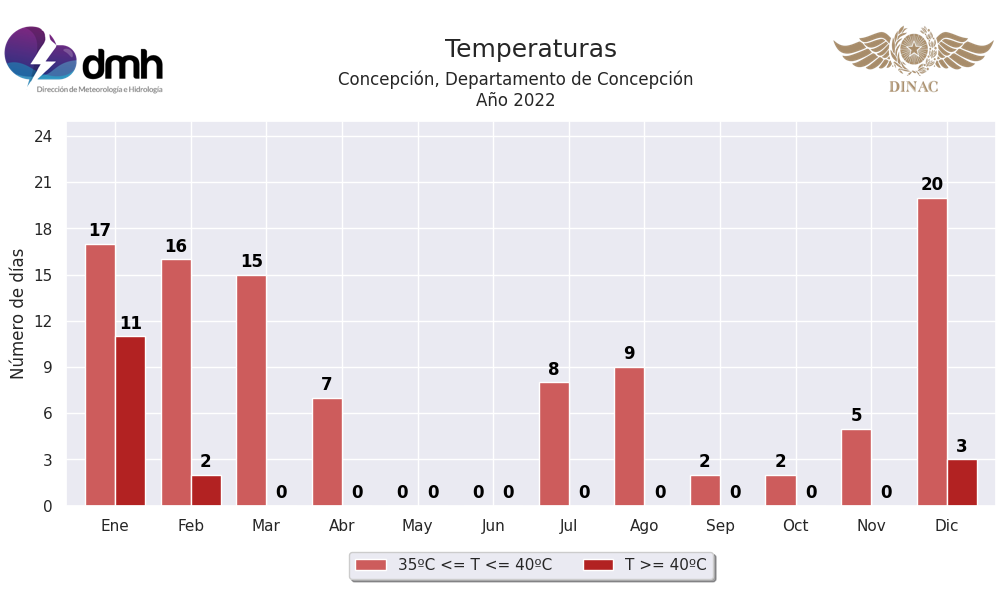

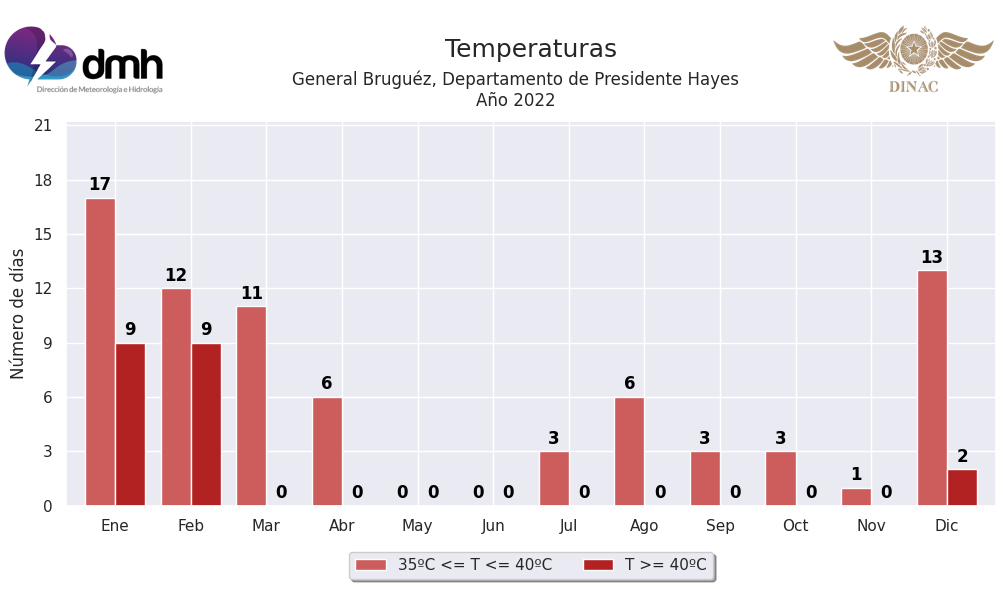

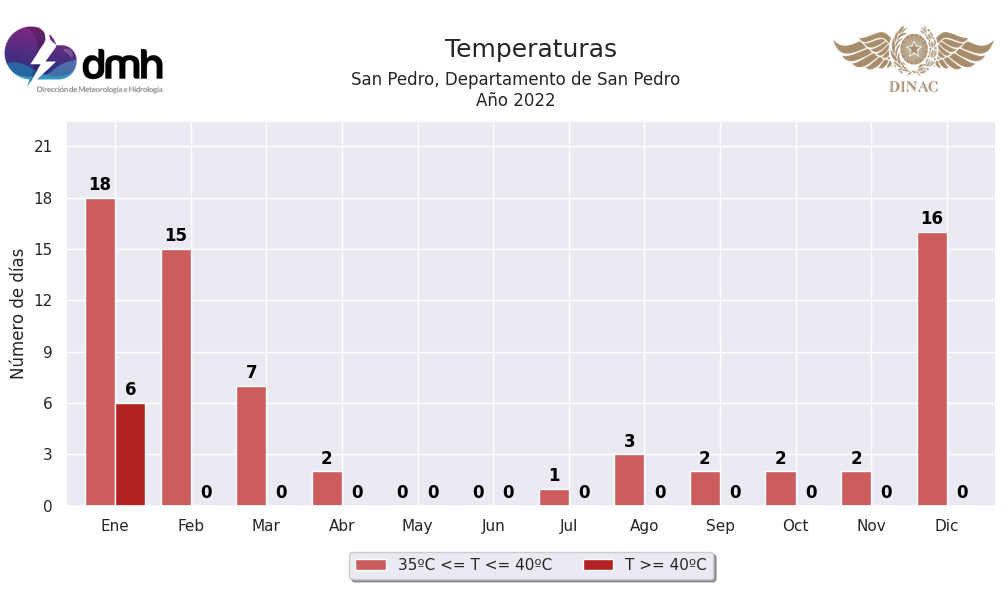

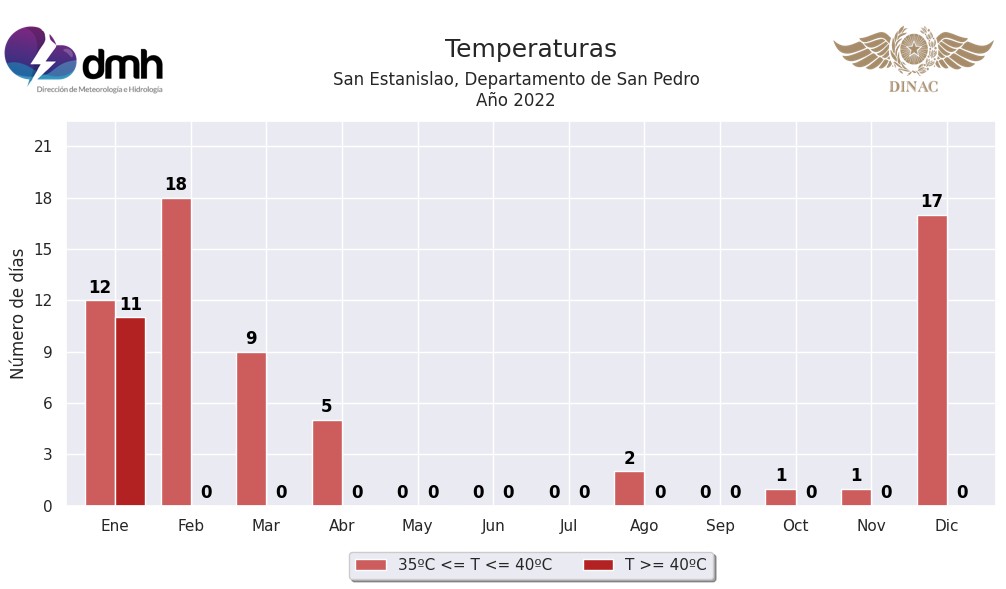

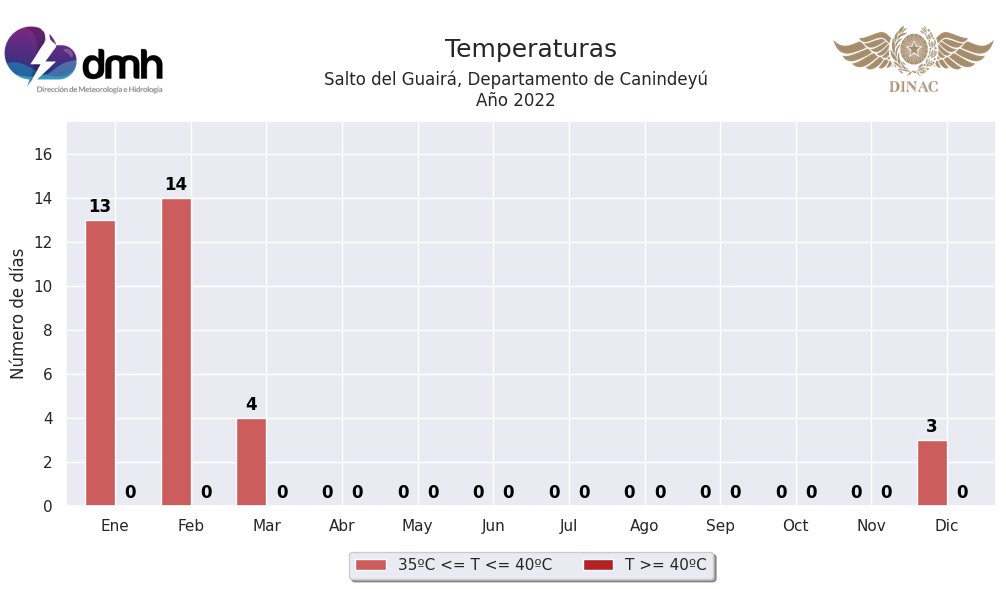

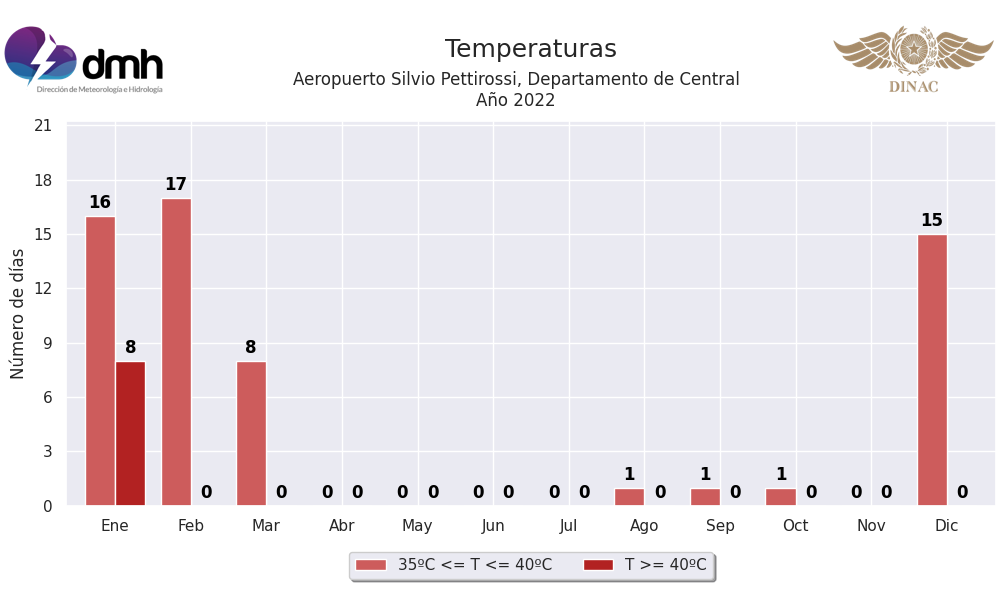

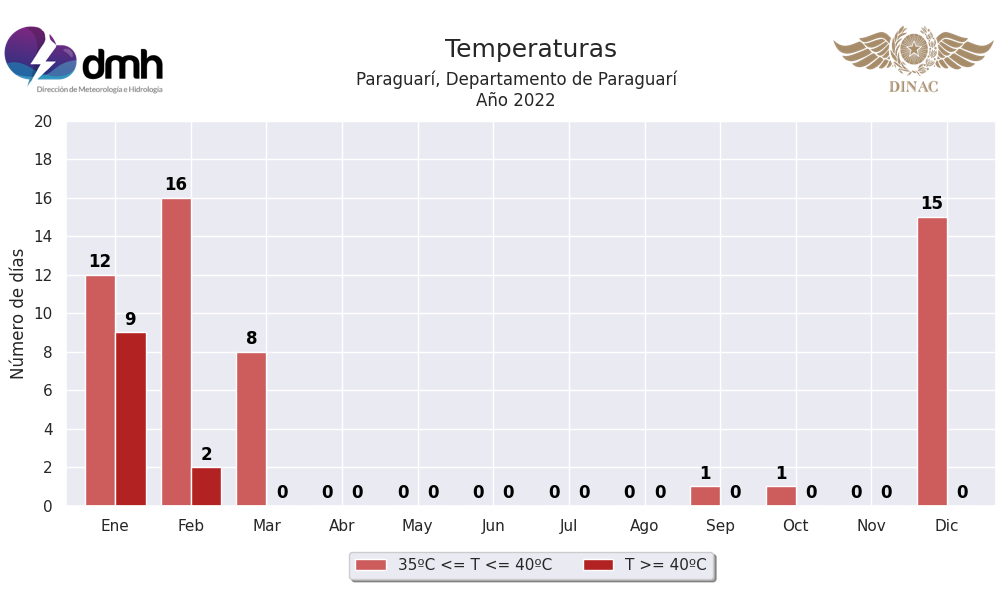

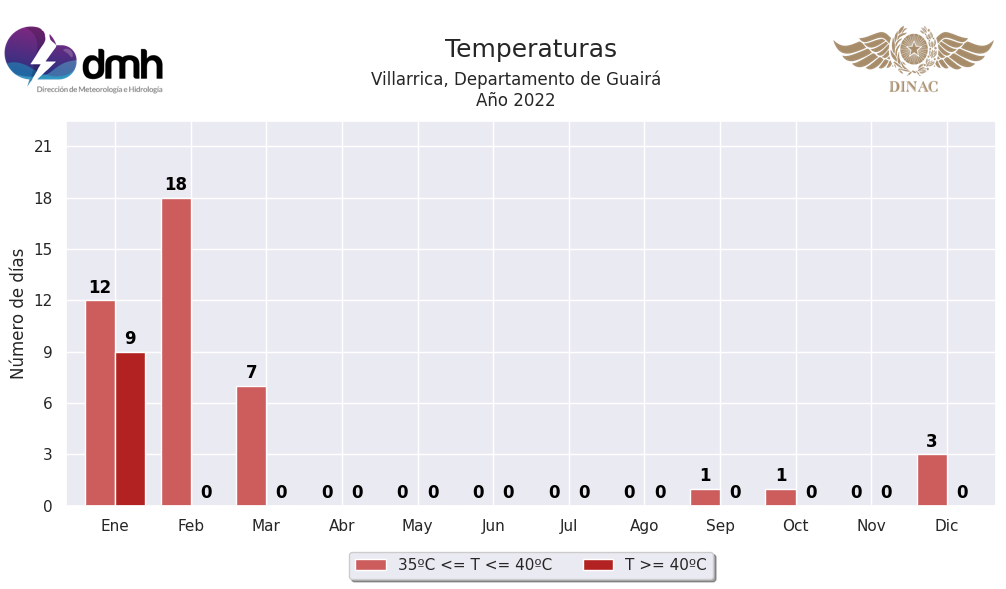

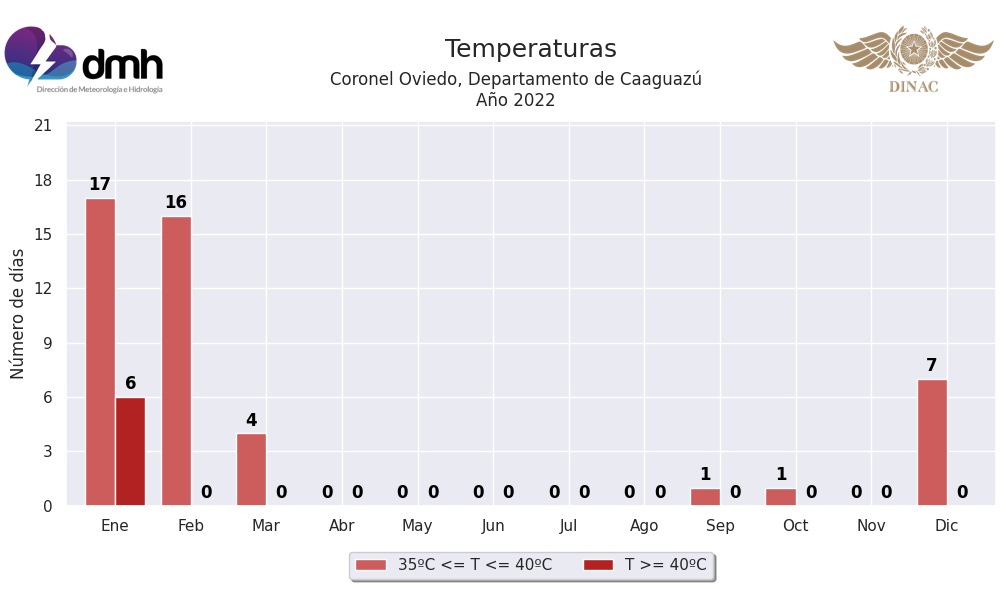

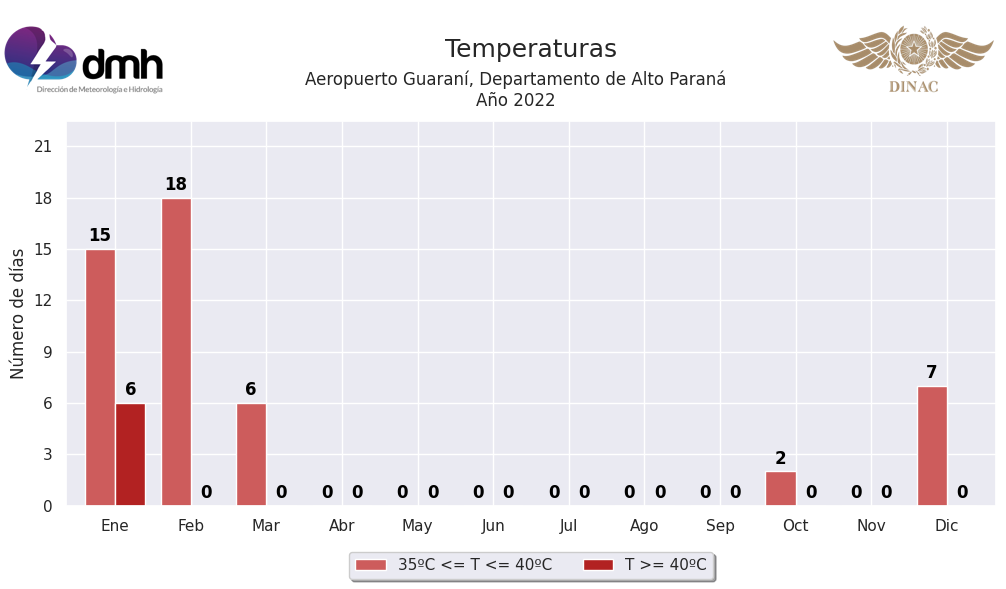

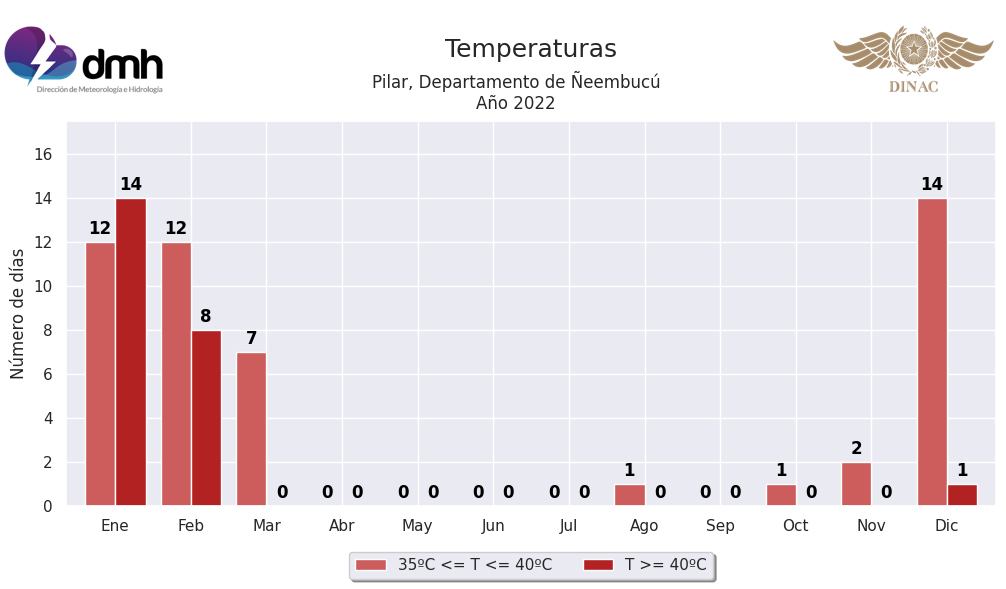

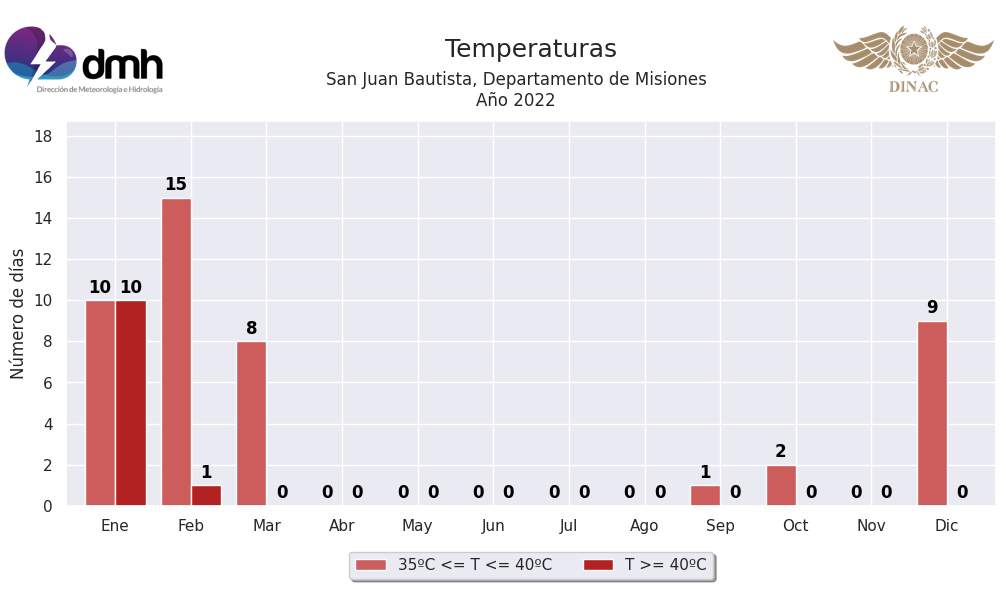

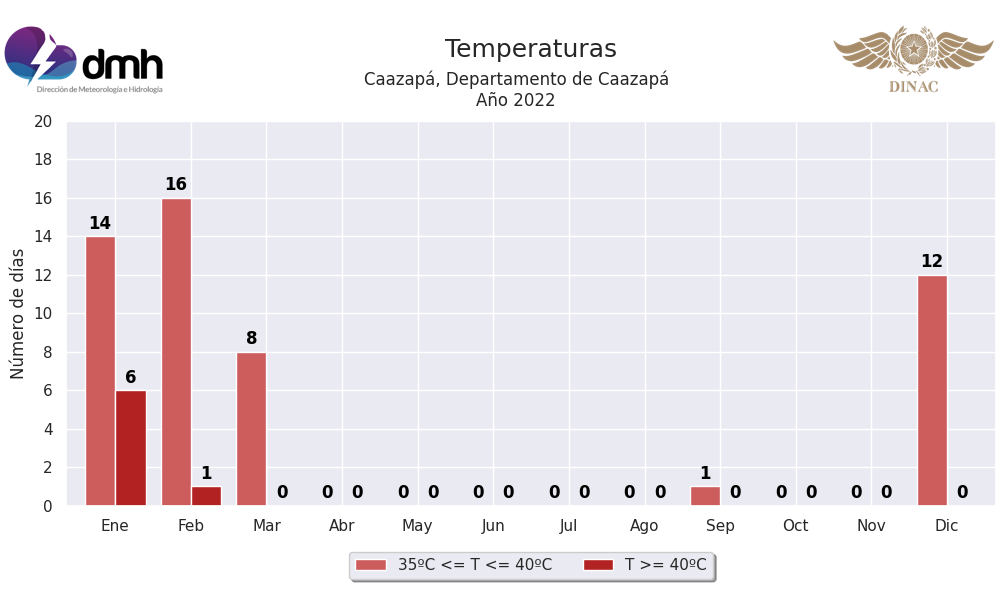

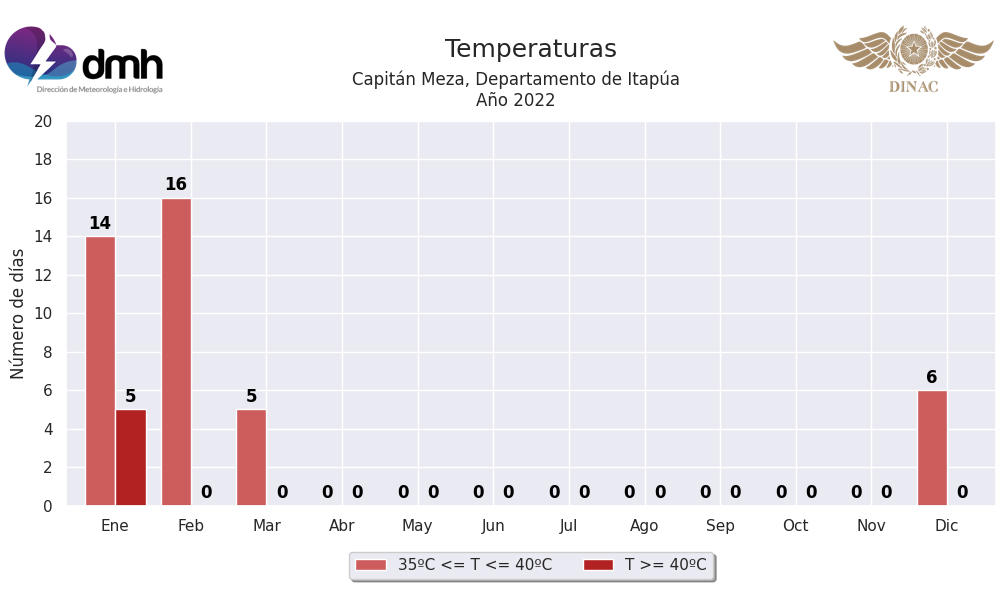

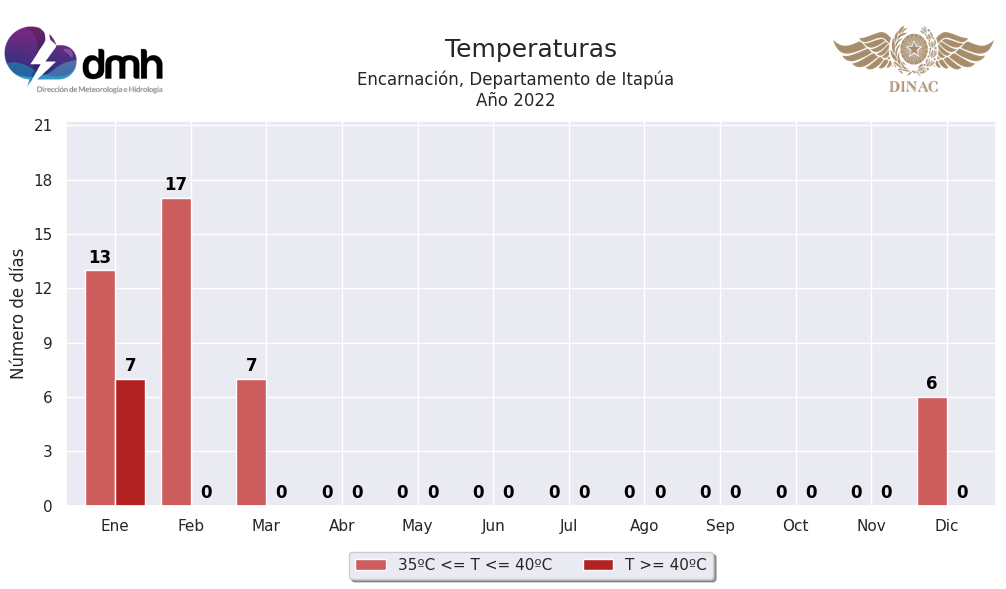

In [10]:
for j in range(T_min.shape[0]):
    
    datos = pd.DataFrame(columns=['T_35_40','T_40'])
        
    datos['T_35_40'], datos['T_40']= T_35_40.iloc[j,2:], T_40.iloc[j,2:]
    
    datos["Mes"] = meses
    
    datos = datos.set_index("Mes")
    
    valor_max = max(datos.max())
    
    estacion = locacion.iloc[j,1:]

    # create a figure and axes for the plot

    fig_size = (12, 5)

    fig, ax = plt.subplots(figsize=(20, 10))

    datos[['T_35_40','T_40']].plot.bar(ax=ax, width=0.8, figsize=fig_size, color=['indianred','firebrick'] )

    # load the image
    dimensiones = (168, 72)

    logo_dmh = Image.open('Data/logo_dmh1.png').resize(dimensiones)

    logo_dinac = Image.open('Data/dinac1.png').resize(dimensiones)

    x_dinac = int(fig_size[0]*(1-0.308)*100)

    y_logo = int(fig_size[1]*(1-0.0125)*100)

    ax.figure.figimage(logo_dmh, 0, y_logo, zorder=1)

    ax.figure.figimage(logo_dinac, x_dinac, y_logo, zorder=1)

    for i in range(12):
#        plt.text(i-0.12+0.07*switch(datos.T_35_40[i]), datos.T_35_40[i]-0.2, datos.T_35_40[i], rotation = 0, va="top", ha='right', size='medium', weight='semibold', color="white")
        plt.text(i-0.2, datos.T_35_40[i] + valor_max*0.025, datos.T_35_40[i], rotation = 0, ha='center', size='medium', weight='semibold', color="black")    
        
    for i in range(12):
        #plt.text(i+0.25+0.1*switch(datos.T_40[i]), datos.T_40[i]-0.2, datos.T_40[i], rotation = 0, va="top", ha='right', size='medium', weight='semibold', color="white")
        plt.text(i+0.2, datos.T_40[i] + valor_max*0.025, datos.T_40[i], rotation = 0, ha='center', size='medium', weight='semibold', color="black")    
  
    ax.set_xticklabels(meses)

    plt.xticks(rotation=0)

    ax.legend(['35ºC <= T <= 40ºC', 'T >= 40ºC'], loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

    plt.title('\nTemperaturas\n\n', fontsize=18)

    plt.suptitle(estacion.Estacion + ', Departamento de ' + estacion.Departamento + '\nAño 2022\n', fontsize=12)

    plt.xlabel(None)
    
    plt.ylabel('Número de días')
    
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    ax.set_ylim(top=valor_max*1.25)

    nombre_im = T_min.Estaciones[j].replace('.','_').replace(' ','_') + '/' + 'T_maximas-' + estacion.Estacion.replace('.','_').replace(' ','_')

    fig.savefig(nombre_im, bbox_inches='tight')

In [51]:
fig_size[0]

12

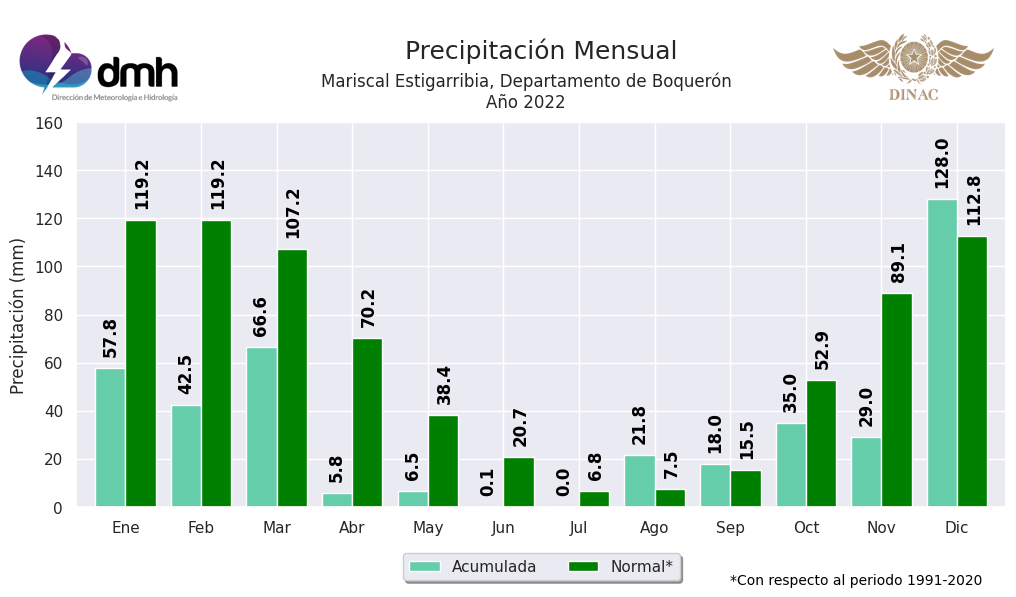

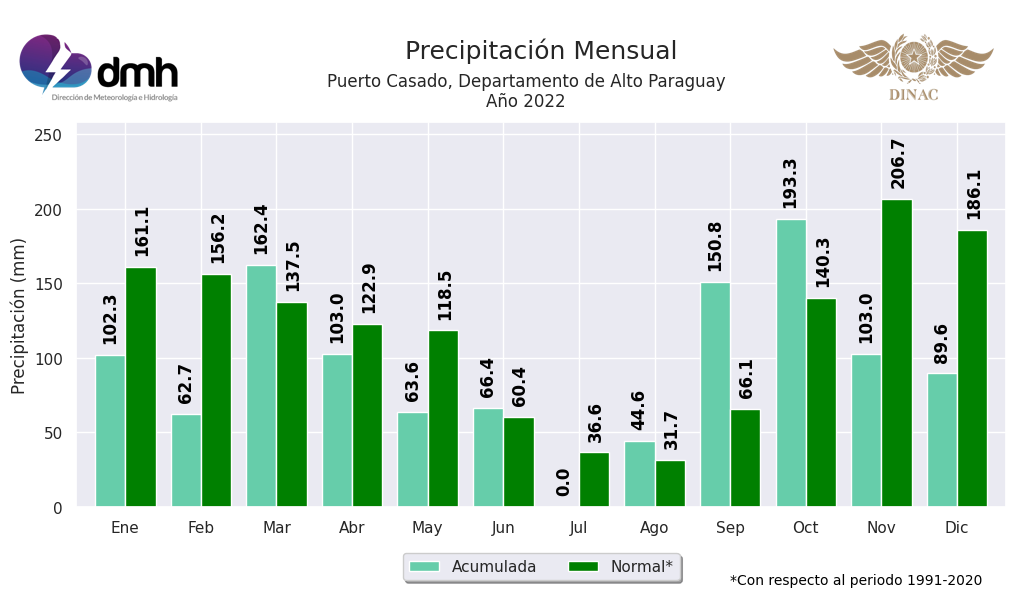

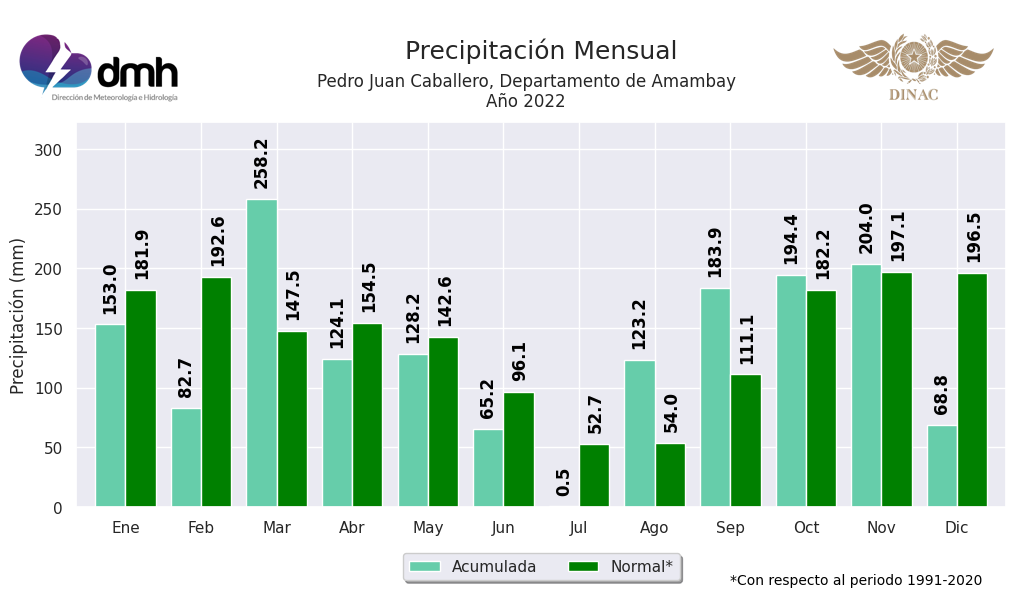

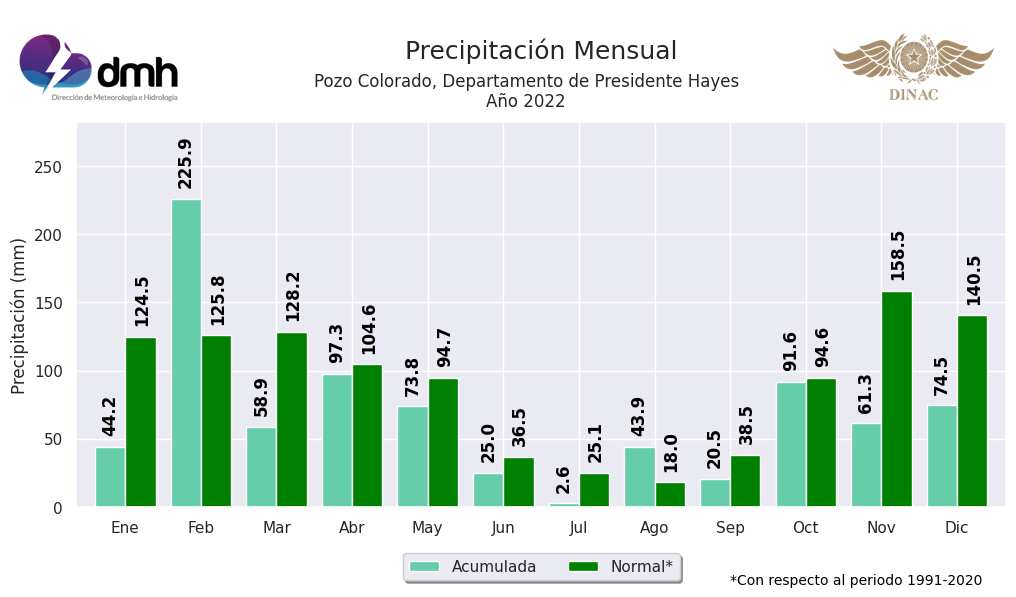

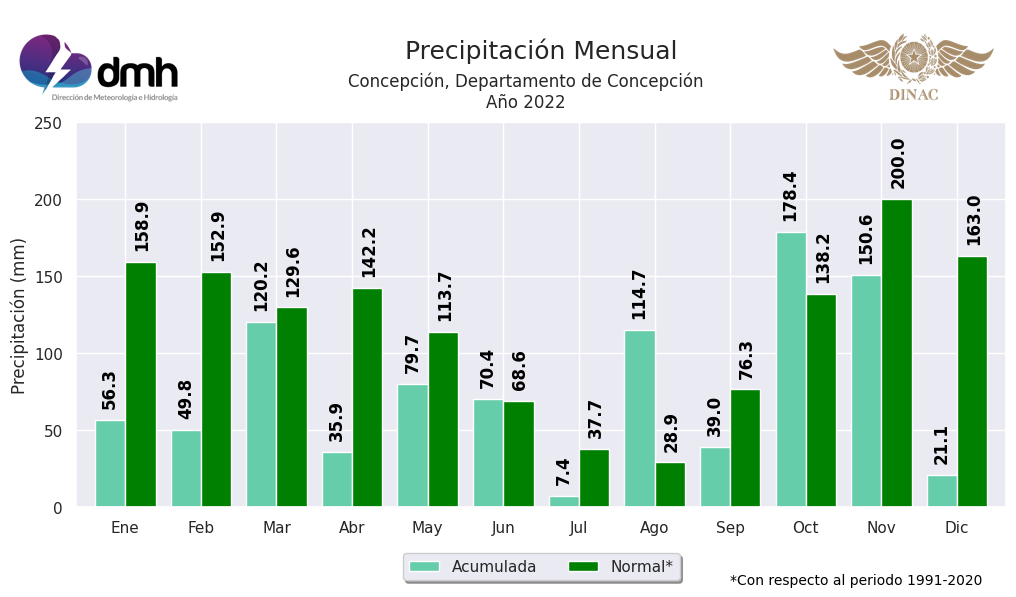

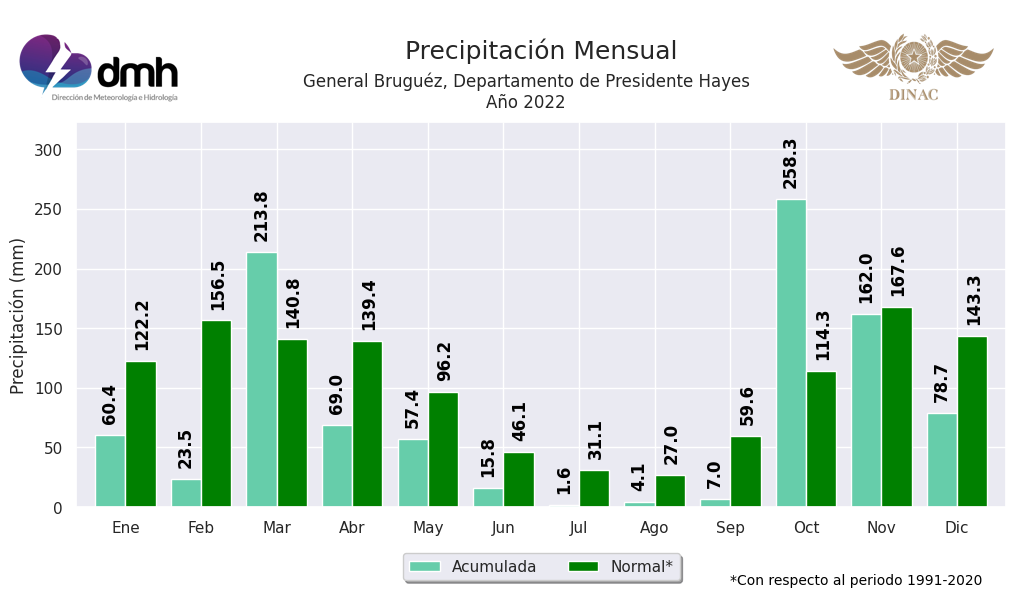

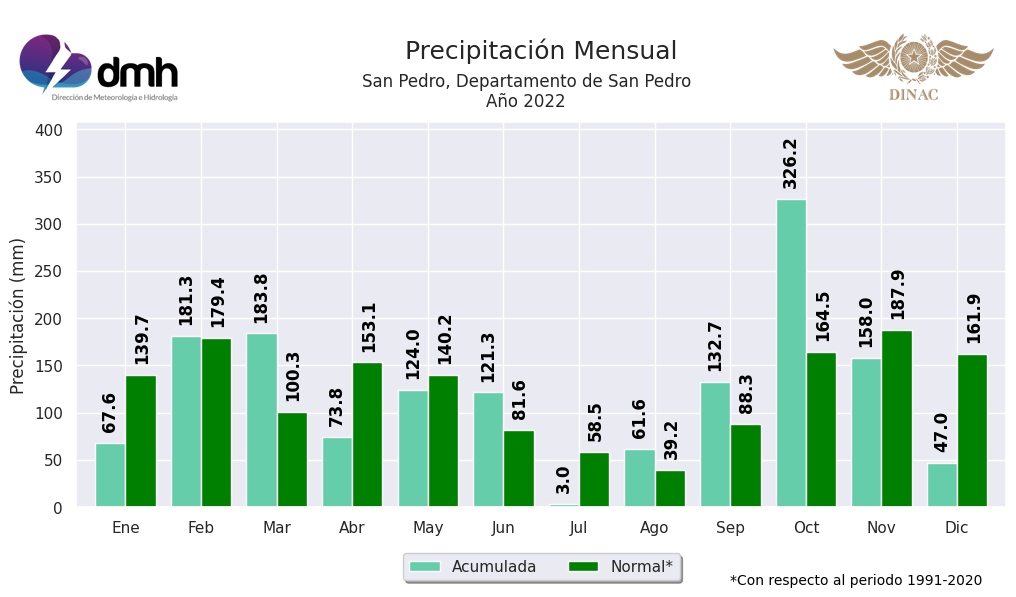

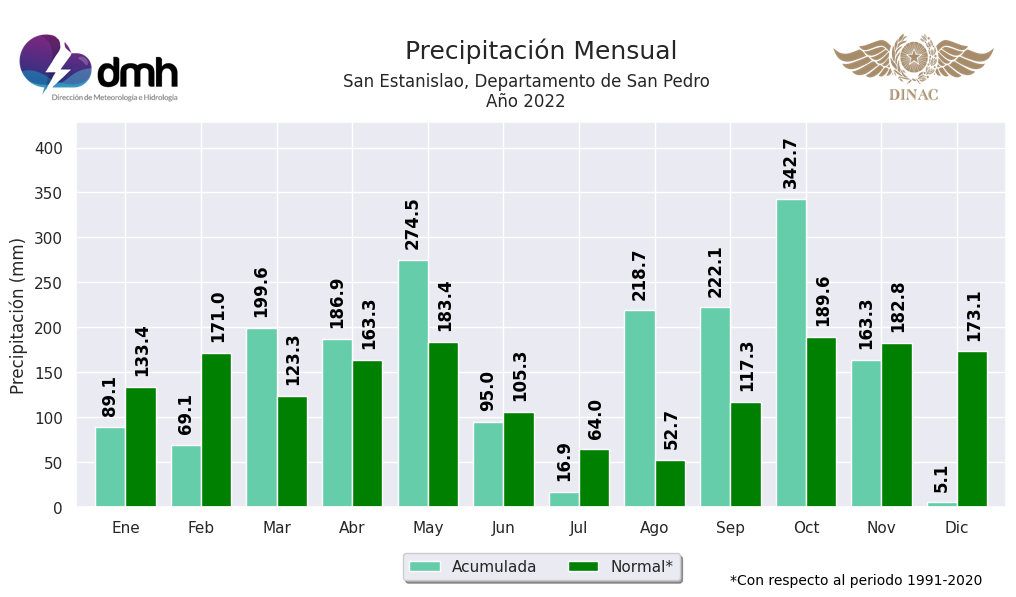

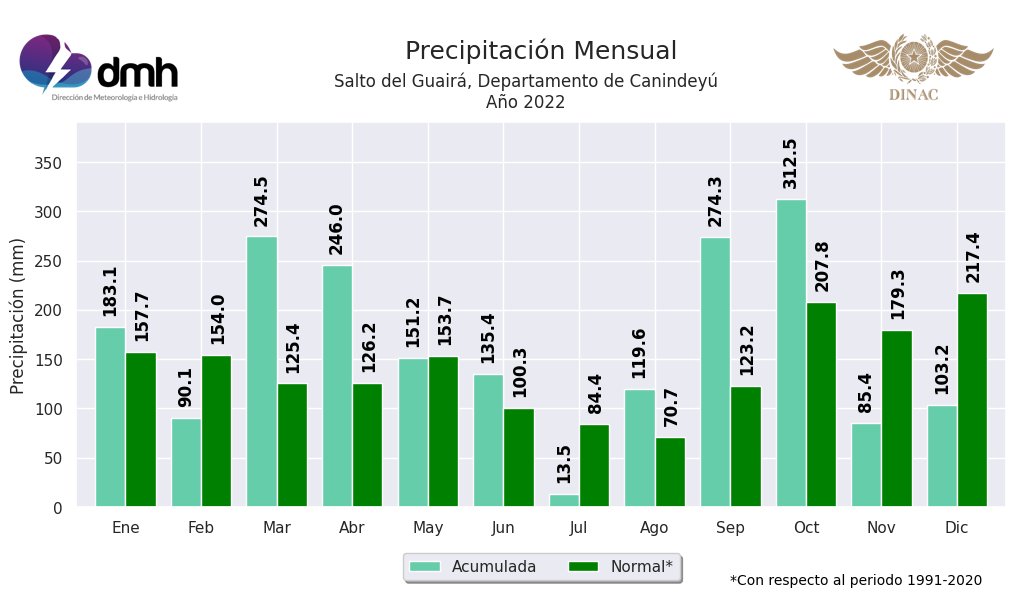

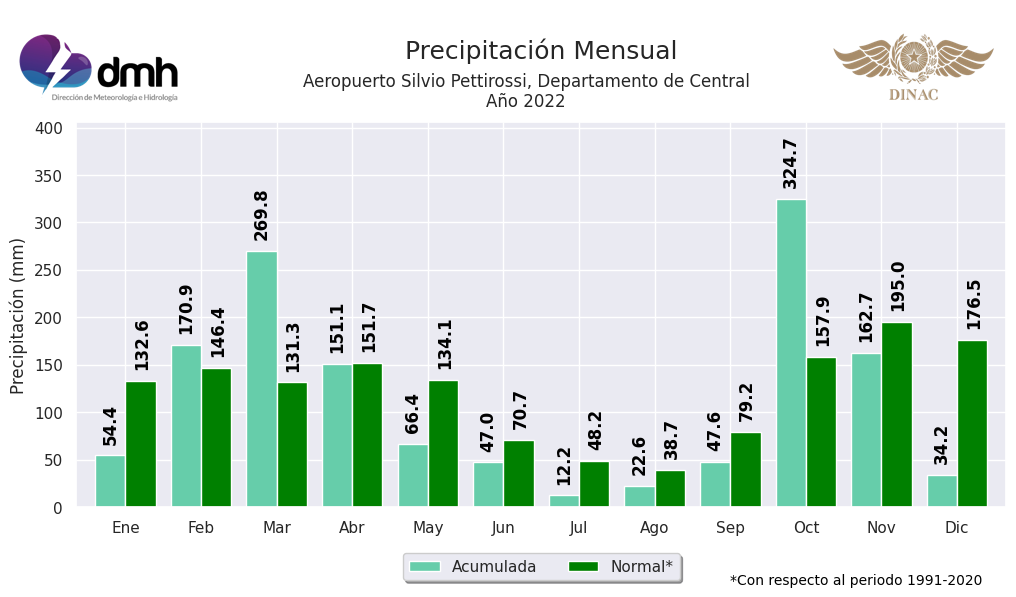

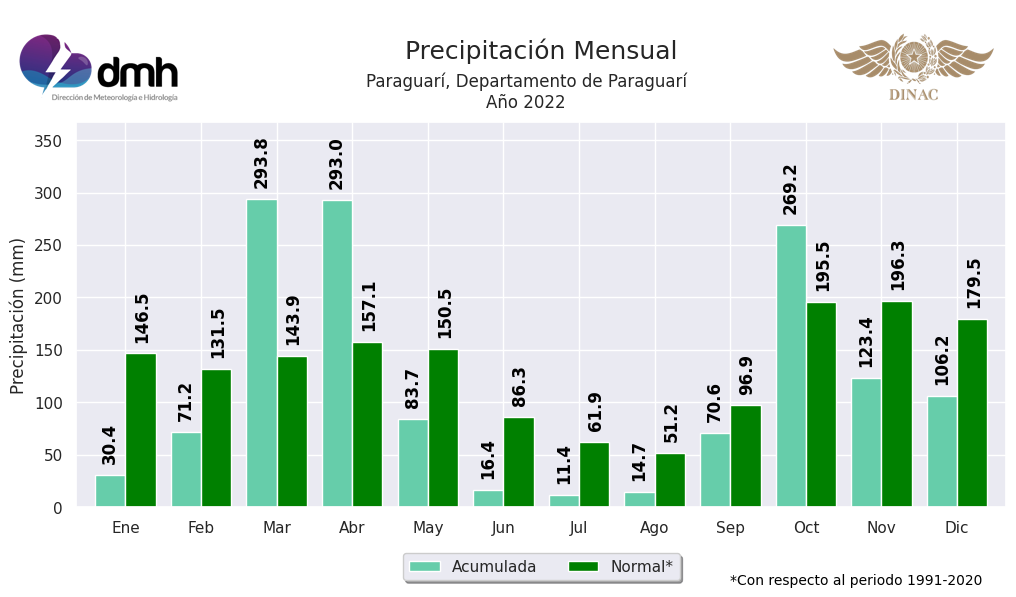

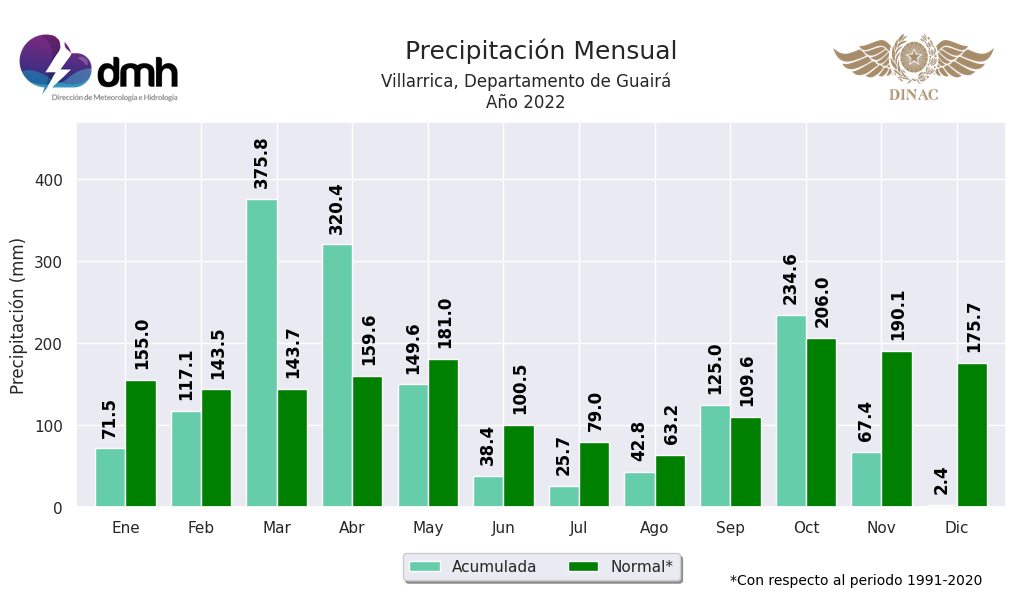

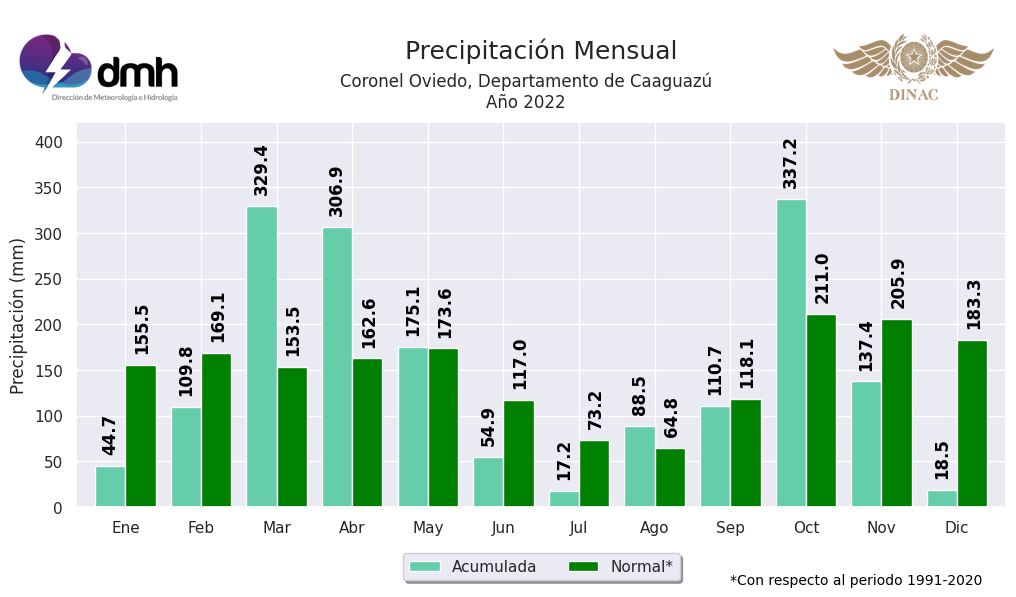

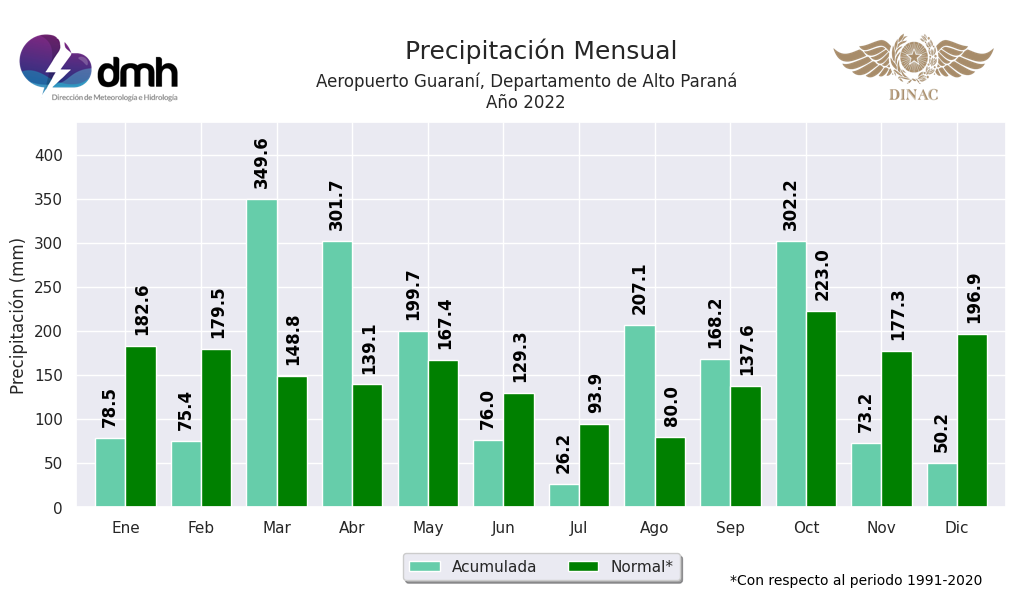

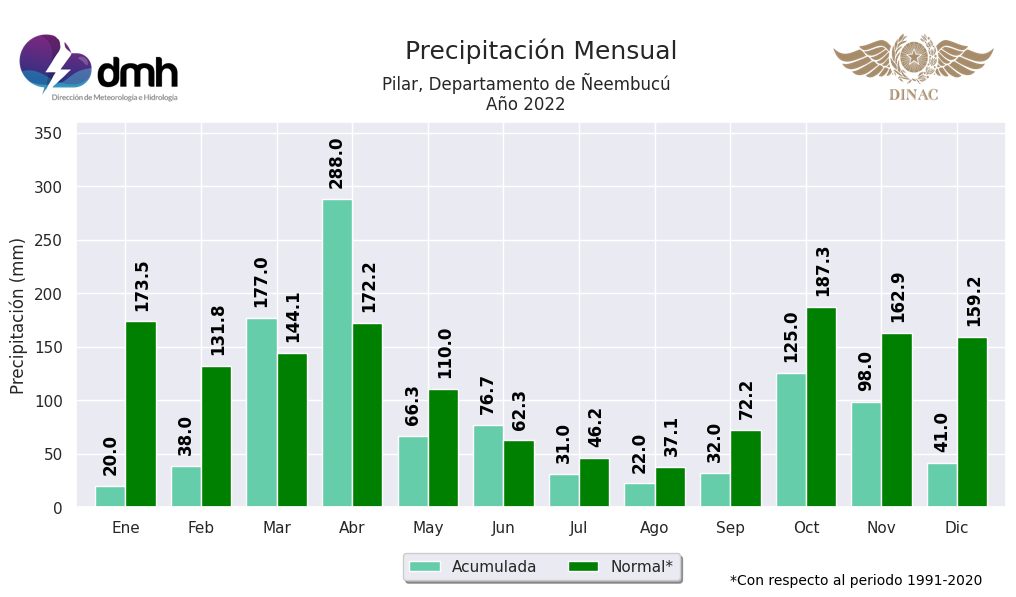

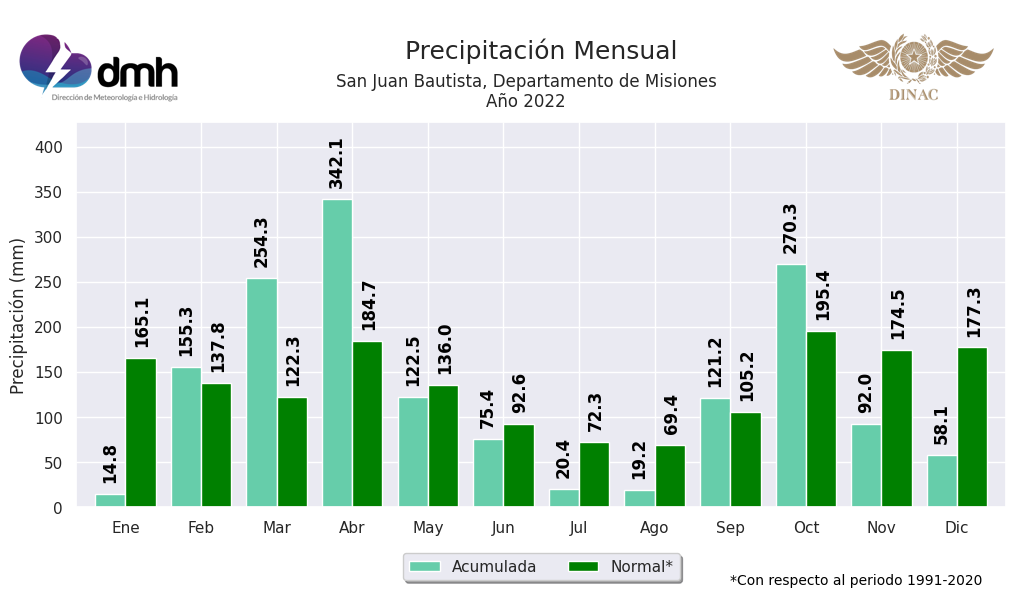

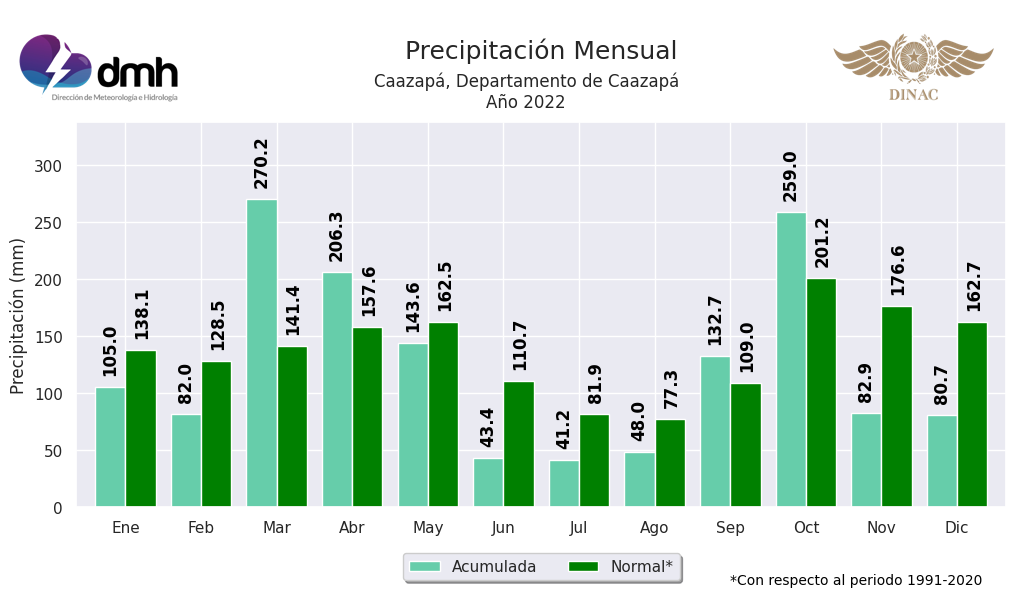

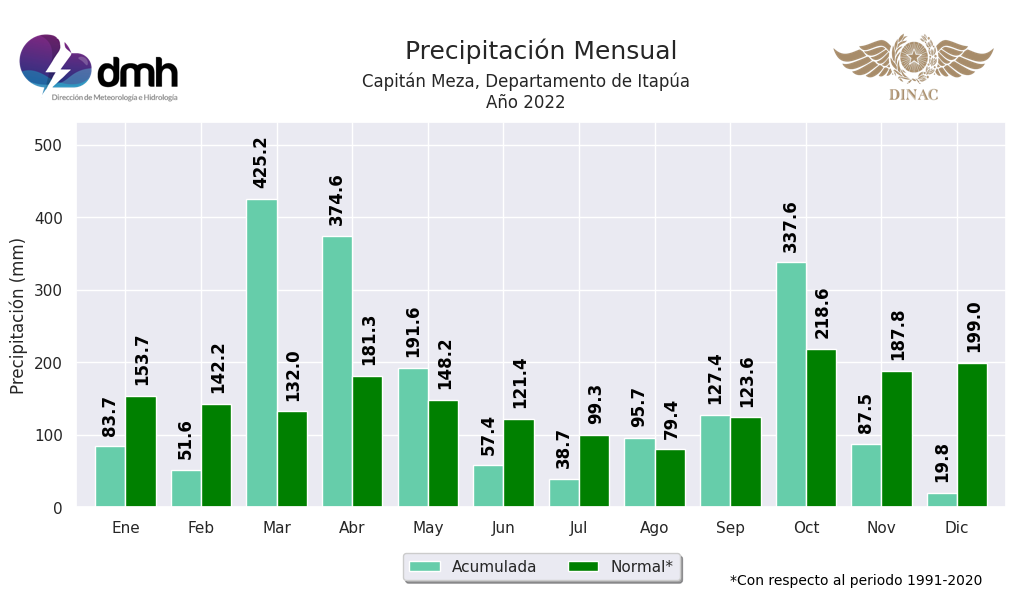

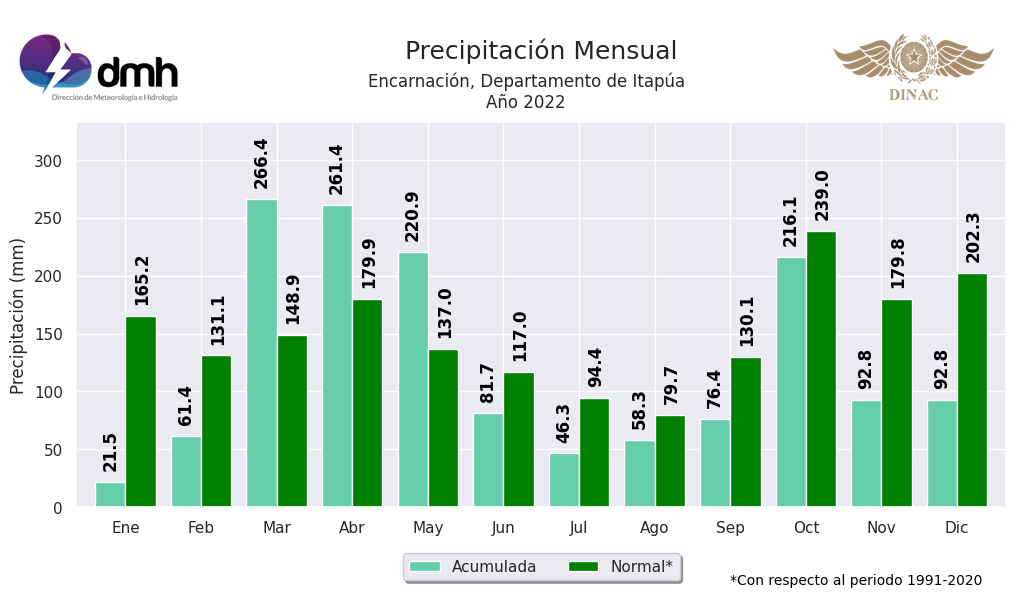

In [53]:


for j in range(T_min.shape[0]):
    
    valores_min = []
    
    datos = pd.DataFrame(columns=['Acumulado','Normal'])
    
    datos['Acumulado'], datos['Normal']= precip.iloc[j,2:], precip_normal.iloc[j,2:]
    
    datos["Mes"] = meses
    
    datos = datos.set_index("Mes")
    
    valor_max = max(datos.max())
    
    estacion = locacion.iloc[j,1:]

    # create a figure and axes for the plot

    fig_size = (12, 5)

    fig, ax = plt.subplots(figsize=(20, 10))

    datos[['Acumulado','Normal']].plot.bar(ax=ax, width=0.8, figsize=fig_size, color=['mediumaquamarine','green'] )

    # load the image
    dimensiones = (168, 72)

    logo_dmh = Image.open('Data/logo_dmh1.png').resize(dimensiones)

    logo_dinac = Image.open('Data/dinac1.png').resize(dimensiones)

    x_dinac = int(fig_size[0]*(1-0.308)*100)

    y_logo = int(fig_size[1]*(1-0.0125)*100)

    ax.figure.figimage(logo_dmh, x_dinac*0.018, y_logo, zorder=1)

    ax.figure.figimage(logo_dinac, x_dinac, y_logo, zorder=1)

    for i in range(12):
        
        #if datos.Acumulado[i]/valor_max > 0.13:
        plt.text(i-0.2, datos.Acumulado[i] + valor_max*0.05, datos.Acumulado[i], rotation = 90, ha='center', size='medium', weight='semibold', color="black")    
        
            
    
#       plt.text(i-0.08, datos.Acumulado[i]-0.2, datos.Acumulado[i], rotation = 90, va="top", ha='right', size='medium', weight='semibold', color="white")

#   elif datos.Acumulado[i] > 0:

        box=dict(boxstyle="larrow", ec="white", fc='skyblue',pad=0.1)
#
#        plt.text(i-0.2, datos.Acumulado[i] + valor_max*0.05, datos.Acumulado[i], rotation = 90, ha='center', size='medium', weight='semibold', color="white", bbox=box)        
         
    for i in range(12):
            
        plt.text(i+0.225, datos.Normal[i] + valor_max*0.05, datos.Normal[i], rotation = 90, ha='center', size='medium', weight='semibold', color="black")        
#            plt.text(i+0.35, datos.Normal[i]-0.2, datos.Normal[i], rotation = 90, va="top", ha='right', size='medium', weight='semibold', color="white")
        
#        elif datos.Normal[i] > 0:
            
            #box=dict(boxstyle="larrow", ec="white", fc='royalblue',pad=0.1)
            
#            plt.text(i+0.225, datos.Normal[i] + valor_max*0.05, datos.Normal[i], rotation = 65, ha='center', size='medium', weight='semibold', color="black")        

            
    ax.set_xticklabels(meses)

    plt.xticks(rotation=0)

    ax.legend(['Acumulada', 'Normal*'], loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
    
    ax.text(8, -valor_max*0.25, '*Con respecto al periodo 1991-2020', size='small', weight='light', color="black")        

    plt.title('\nPrecipitación Mensual\n\n', fontsize=18)

    plt.suptitle(estacion.Estacion + ', Departamento de ' + estacion.Departamento + '\nAño 2022\n', fontsize=12)

    plt.xlabel(None)
    
    plt.ylabel('Precipitación (mm)')
    
    ax.set_ylim(top=valor_max*1.25)

    nombre_im = precip.Estaciones[j].replace('.','_').replace(' ','_') + '/' + 'Precipitacion-' + estacion.Estacion.replace('.','_').replace(' ','_')
    
    fig.savefig(nombre_im, bbox_inches='tight')